#####Еnvironment Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata as un

In [2]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Mate/Mate_pandas/pandas_practical/final_task

/content/drive/MyDrive/Mate/Mate_pandas/pandas_practical/final_task


#Data overview

In [4]:
# імпортt CSV файлу
countries = pd.read_csv("countries.csv")
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [5]:
# ознайомлення із змістом
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [6]:
# імпортt CSV файлу
events = pd.read_csv("events.csv")
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [7]:
# ознайомлення із змістом
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [8]:
# імпортt CSV файлу
products = pd.read_csv("products.csv")
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [9]:
# ознайомлення із змістом
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


###Висновки

Основні поля, які поєднують три таблиці: це Product ID в таблиці events, id в таблиці products та alpha-3 в таблиці countries, яка поєднується з events через стовпець Country Code.

#Data cleaning

#####Countries

In [10]:
# перевіряємо типи даних та аявність пропущених значень
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


Всі дані в таблиці розпізнаються коректно, перетворення типів у колонках робити не треба.

In [11]:
# частка пропущених значень
countries.isna().sum() / countries.shape[0] * 100

,0
name,0.000000
alpha-2,0.401606
alpha-3,0.000000
region,0.401606
sub-region,0.401606


Частка відсутніх значень невелика, оскільки в подальшому таблиці будуть поєднуюватися через стовпець alpha-3, а в ньому відсутніх значень немає, то не буду видаляти рядки, а просто заповню словом "Unknown"

In [12]:
# заповнюємо відсутні значення
countries['alpha-2'] = countries['alpha-2'].fillna('Unknown')
countries['region'] = countries['region'].fillna('Unknown')
countries['sub-region'] = countries['sub-region'].fillna('Unknown')

In [13]:
#перевірка дублікатів
duplicates = countries[countries.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [name, alpha-2, alpha-3, region, sub-region]
Index: []


За даною перевіркою дублікати у таблиці відсутні. Але проведу додаткові маніпуляції для їх усунення


In [14]:
# видаляю зайві пробіли
countries[countries.select_dtypes(include=['object']).columns] = countries.select_dtypes(include=['object']).apply(lambda x: x.str.strip())

In [15]:
# нормалізую текст
def normalize_text(text):
    return un.normalize('NFKD', text)

countries = countries.apply(lambda x: x.apply(normalize_text) if x.dtype == 'object' else x)

In [16]:
# усуваю розбіжність у великих/малих літерах
countries[countries.select_dtypes(include=['object']).columns] = countries.select_dtypes(include=['object']).apply(lambda x: x.str.lower())

Аномалій у даній таблиці не буде, оскільки вона не містить числових даних

#####Events

In [17]:
# перевіряємо типи даних та наявність пропущених значень
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [18]:
# частка пропущених значень
events.isna().sum() / events.shape[0] * 100

,0
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Order Priority,0.000000
Country Code,6.165414
Product ID,0.000000
Sales Channel,0.000000
Units Sold,0.150376
Unit Price,0.000000
Unit Cost,0.000000


Частка пропущених значень у 'Country Code'
велика, але якось співвіднести їх із країнами та заповнити я не бачу можливості. Заповню ці пропуски словом "Unknown", щоб при візуалізації даних не впливати на статистику продажів.

У стовпчику 'Units Sold' частка відсутніх значень несуттєва, тож їх можна видалити.

In [19]:
# заповнюємо відсутні значення у стовпці Country Code
events['Country Code'] = events['Country Code'].fillna('Unknown')

In [20]:
# видаляємо відсутні значення у стовпці Units Sold
events = events.dropna()
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1328 non-null   int64  
 1   Order Date      1328 non-null   object 
 2   Ship Date       1328 non-null   object 
 3   Order Priority  1328 non-null   object 
 4   Country Code    1328 non-null   object 
 5   Product ID      1328 non-null   int64  
 6   Sales Channel   1328 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1328 non-null   float64
 9   Unit Cost       1328 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 114.1+ KB


Стовпці Order Date та Ship Date містять невірний ти даних. Заміняємо його.
    

In [21]:
# змінюємо тип даних
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])

<ipython-input-21-8bdf4ea95235>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events["Order Date"] = pd.to_datetime(events["Order Date"])
<ipython-input-21-8bdf4ea95235>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events["Ship Date"] = pd.to_datetime(events["Ship Date"])


In [22]:
# перевіряємо
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB


In [23]:
# Перевіряємо наявність дублікатів
duplicate_rows = events.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1328, dtype: bool
0


За даною перевіркою дублікати у таблиці відсутні. Але проведу додаткові маніпуляції для їх усунення


In [24]:
# видаляю зайві пробіли
events[events.select_dtypes(include=['object']).columns] = events.select_dtypes(include=['object']).apply(lambda x: x.str.strip())

<ipython-input-24-08aa991b29ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events[events.select_dtypes(include=['object']).columns] = events.select_dtypes(include=['object']).apply(lambda x: x.str.strip())


In [25]:
# нормалізую текст
def normalize_text(text):
    return un.normalize('NFKD', text)

events = events.apply(lambda x: x.apply(normalize_text) if x.dtype == 'object' else x)

In [26]:
# усуваю розбіжність у великих/малих літерах
events[events.select_dtypes(include=['object']).columns] = events.select_dtypes(include=['object']).apply(lambda x: x.str.lower())

In [27]:
# перевіряємо таблицю на аномалії
events.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.328000e+03,1328,1328,1328.000000,1328.000000,1328.000000,1328.000000
mean,5.416231e+08,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,5787.775602,4952.201807,264.913245,187.211521
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.213291e+08,2011-12-14 06:00:00,2012-01-02 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.399925e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.547357e+08,2015-08-29 12:00:00,2015-10-04 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573496e+08,NaN,NaN,2820.635702,2905.198996,217.386320,176.187801


Стовпці Units Sold, Unit Price та	Unit Cost мають аномальні значення, оскільки максимальні та мінімальні значення
знаходяться за межами трьох стандартних відхилень, що свідчить про сильно розкидані значеня.

При цьому максимальне значення (max) значно більше за 75%-й перцентиль, а мінімальне значення (min) значно менше за 25%-й перцентиль.
У стовпцях Unit Price та	Unit Cost середнє значення (mean) значно відрізняється від медіани (50%-го перцентиля), що може вказувати на асиметричний розподіл або наявність викидів.

На мою думку це повязано із тим, що продукція, яку продає компанія належить до різних категорій, тож має різну ціну та собівартість.

#####Products

In [28]:
# перевіряємо типи даних та наявність пропущених значень
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


Пропущені значення відсутні

Всі дані в таблиці розпізнаються коректно, перетворення типів у колонках робити не треба.

In [29]:
# Перевіряємо наявність дублікатів
duplicate_rows = products.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
0


За даною перевіркою дублікати у таблиці відсутні. Але проведу додаткові маніпуляції для їх усунення

In [30]:
# видаляю зайві пробіли
products[products.select_dtypes(include=['object']).columns] = products.select_dtypes(include=['object']).apply(lambda x: x.str.strip())

In [31]:
# нормалізую текст
def normalize_text(text):
    return un.normalize('NFKD', text)

events = events.apply(lambda x: x.apply(normalize_text) if x.dtype == 'object' else x)

In [32]:
# усуваю розбіжність у великих/малих літерах
products[products.select_dtypes(include=['object']).columns] = products.select_dtypes(include=['object']).apply(lambda x: x.str.lower())

Оскільки дані про діяльність компанії у цій таблиці відсутні, досліджувати її на аномалії не треба.

#Data analysis and visualization


###Table joining

In [33]:
#обєднуємо таблиці countries та events
merged_df1 = pd.merge(countries, events, left_on='alpha-3', right_on='Country Code', how="right")
print(merged_df1)

            name alpha-2 alpha-3  region       sub-region   Order ID  \
0         norway      no     nor  europe  northern europe  100640618   
1         serbia      rs     srb  europe  southern europe  100983083   
2            NaN     NaN     NaN     NaN              NaN  101025998   
3     montenegro      me     mne  europe  southern europe  102230632   
4         serbia      rs     srb  europe  southern europe  103435266   
...          ...     ...     ...     ...              ...        ...   
1323      sweden      se     swe  europe  northern europe  994504153   
1324       italy      it     ita  europe  southern europe  994978797   
1325      russia      ru     rus  europe   eastern europe  996754205   
1326       malta      mt     mlt  europe  southern europe  998043382   
1327     albania      al     alb  europe  southern europe  999879729   

     Order Date  Ship Date Order Priority Country Code  Product ID  \
0    2014-10-08 2014-10-18              m          nor        210

In [34]:
# перевірка
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            1246 non-null   object        
 1   alpha-2         1246 non-null   object        
 2   alpha-3         1246 non-null   object        
 3   region          1246 non-null   object        
 4   sub-region      1246 non-null   object        
 5   Order ID        1328 non-null   int64         
 6   Order Date      1328 non-null   datetime64[ns]
 7   Ship Date       1328 non-null   datetime64[ns]
 8   Order Priority  1328 non-null   object        
 9   Country Code    1328 non-null   object        
 10  Product ID      1328 non-null   int64         
 11  Sales Channel   1328 non-null   object        
 12  Units Sold      1328 non-null   float64       
 13  Unit Price      1328 non-null   float64       
 14  Unit Cost       1328 non-null   float64       
dtypes: d

Оскільки з таблиці events не було видалено рядки, де значення стовпця Country Code невідоме, після обєднання таблиць у рядках таблиці Countries зявилися значення "na". Не будемо їх видаляти, оскільки це вплине на статистику продажів.


In [35]:
# фінальне обєднання
final_merged_df = pd.merge(merged_df1, products, left_on='Product ID', right_on='id', how='left')

In [36]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            1246 non-null   object        
 1   alpha-2         1246 non-null   object        
 2   alpha-3         1246 non-null   object        
 3   region          1246 non-null   object        
 4   sub-region      1246 non-null   object        
 5   Order ID        1328 non-null   int64         
 6   Order Date      1328 non-null   datetime64[ns]
 7   Ship Date       1328 non-null   datetime64[ns]
 8   Order Priority  1328 non-null   object        
 9   Country Code    1328 non-null   object        
 10  Product ID      1328 non-null   int64         
 11  Sales Channel   1328 non-null   object        
 12  Units Sold      1328 non-null   float64       
 13  Unit Price      1328 non-null   float64       
 14  Unit Cost       1328 non-null   float64       
 15  id  

In [37]:
# замінюємо значення NA у таблиці на Unknown
final_merged_df['name'] = final_merged_df['name'].fillna('Unknown')
final_merged_df['alpha-2'] = final_merged_df['alpha-2'].fillna('Unknown')
final_merged_df['alpha-3'] = final_merged_df['alpha-3'].fillna('Unknown')
final_merged_df['region'] = final_merged_df['region'].fillna('Unknown')
final_merged_df['sub-region'] = final_merged_df['sub-region'].fillna('Unknown')

In [38]:
# перевірка
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            1328 non-null   object        
 1   alpha-2         1328 non-null   object        
 2   alpha-3         1328 non-null   object        
 3   region          1328 non-null   object        
 4   sub-region      1328 non-null   object        
 5   Order ID        1328 non-null   int64         
 6   Order Date      1328 non-null   datetime64[ns]
 7   Ship Date       1328 non-null   datetime64[ns]
 8   Order Priority  1328 non-null   object        
 9   Country Code    1328 non-null   object        
 10  Product ID      1328 non-null   int64         
 11  Sales Channel   1328 non-null   object        
 12  Units Sold      1328 non-null   float64       
 13  Unit Price      1328 non-null   float64       
 14  Unit Cost       1328 non-null   float64       
 15  id  

In [39]:
# перевірка
final_merged_df.head()

,name,alpha-2,alpha-3,region,sub-region,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,id,item_type
0,norway,no,nor,europe,northern europe,100640618,2014-10-08,2014-10-18,m,nor,2103,online,650.0,205.70,117.11,2103,cereal
1,serbia,rs,srb,europe,southern europe,100983083,2016-08-11,2016-08-11,c,srb,2103,offline,1993.0,205.70,117.11,2103,cereal
2,Unknown,Unknown,Unknown,Unknown,Unknown,101025998,2014-07-18,2014-08-11,m,unknown,7940,online,4693.0,668.27,502.54,7940,household
3,montenegro,me,mne,europe,southern europe,102230632,2017-05-13,2017-06-13,l,mne,2455,online,1171.0,109.28,35.84,2455,clothes
4,serbia,rs,srb,europe,southern europe,103435266,2012-08-11,2012-09-18,h,srb,1270,offline,7648.0,47.45,31.79,1270,beverages


In [40]:
# видалення зайвих стовпців
final_merged_df = final_merged_df.drop("alpha-2", axis=1)
final_merged_df = final_merged_df.drop("alpha-3", axis=1)
final_merged_df = final_merged_df.drop("Country Code", axis=1)
final_merged_df = final_merged_df.drop("id", axis=1)
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            1328 non-null   object        
 1   region          1328 non-null   object        
 2   sub-region      1328 non-null   object        
 3   Order ID        1328 non-null   int64         
 4   Order Date      1328 non-null   datetime64[ns]
 5   Ship Date       1328 non-null   datetime64[ns]
 6   Order Priority  1328 non-null   object        
 7   Product ID      1328 non-null   int64         
 8   Sales Channel   1328 non-null   object        
 9   Units Sold      1328 non-null   float64       
 10  Unit Price      1328 non-null   float64       
 11  Unit Cost       1328 non-null   float64       
 12  item_type       1328 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 135.0+ KB


In [41]:
# перейменування колонок
final_merged_df.columns = final_merged_df.columns.str.lower().str.replace(" ", "_")
final_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            1328 non-null   object        
 1   region          1328 non-null   object        
 2   sub-region      1328 non-null   object        
 3   order_id        1328 non-null   int64         
 4   order_date      1328 non-null   datetime64[ns]
 5   ship_date       1328 non-null   datetime64[ns]
 6   order_priority  1328 non-null   object        
 7   product_id      1328 non-null   int64         
 8   sales_channel   1328 non-null   object        
 9   units_sold      1328 non-null   float64       
 10  unit_price      1328 non-null   float64       
 11  unit_cost       1328 non-null   float64       
 12  item_type       1328 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 135.0+ KB


In [42]:
# додаємо стовпці із розрахунком ключових показників
final_merged_df["sales_amount"] = final_merged_df["units_sold"] * final_merged_df["unit_price"]
final_merged_df["cost_amount"] = final_merged_df["units_sold"] * final_merged_df["unit_cost"]
final_merged_df["revenue_amount"] = final_merged_df["sales_amount"] - final_merged_df["cost_amount"]
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            1328 non-null   object        
 1   region          1328 non-null   object        
 2   sub-region      1328 non-null   object        
 3   order_id        1328 non-null   int64         
 4   order_date      1328 non-null   datetime64[ns]
 5   ship_date       1328 non-null   datetime64[ns]
 6   order_priority  1328 non-null   object        
 7   product_id      1328 non-null   int64         
 8   sales_channel   1328 non-null   object        
 9   units_sold      1328 non-null   float64       
 10  unit_price      1328 non-null   float64       
 11  unit_cost       1328 non-null   float64       
 12  item_type       1328 non-null   object        
 13  sales_amount    1328 non-null   float64       
 14  cost_amount     1328 non-null   float64       
 15  reve

In [43]:
# перевірка та скорочення назви таблиці
merged_df = final_merged_df
merged_df.head()

,name,region,sub-region,order_id,order_date,ship_date,order_priority,product_id,sales_channel,units_sold,unit_price,unit_cost,item_type,sales_amount,cost_amount,revenue_amount
0,norway,europe,northern europe,100640618,2014-10-08,2014-10-18,m,2103,online,650.0,205.70,117.11,cereal,133705.00,76121.50,57583.50
1,serbia,europe,southern europe,100983083,2016-08-11,2016-08-11,c,2103,offline,1993.0,205.70,117.11,cereal,409960.10,233400.23,176559.87
2,Unknown,Unknown,Unknown,101025998,2014-07-18,2014-08-11,m,7940,online,4693.0,668.27,502.54,household,3136191.11,2358420.22,777770.89
3,montenegro,europe,southern europe,102230632,2017-05-13,2017-06-13,l,2455,online,1171.0,109.28,35.84,clothes,127966.88,41968.64,85998.24
4,serbia,europe,southern europe,103435266,2012-08-11,2012-09-18,h,1270,offline,7648.0,47.45,31.79,beverages,362897.60,243129.92,119767.68


In [44]:
# перейменування колонки 'name' на 'country'
merged_df.rename(columns={'name': 'country'}, inplace=True)
merged_df.head()

,country,region,sub-region,order_id,order_date,ship_date,order_priority,product_id,sales_channel,units_sold,unit_price,unit_cost,item_type,sales_amount,cost_amount,revenue_amount
0,norway,europe,northern europe,100640618,2014-10-08,2014-10-18,m,2103,online,650.0,205.70,117.11,cereal,133705.00,76121.50,57583.50
1,serbia,europe,southern europe,100983083,2016-08-11,2016-08-11,c,2103,offline,1993.0,205.70,117.11,cereal,409960.10,233400.23,176559.87
2,Unknown,Unknown,Unknown,101025998,2014-07-18,2014-08-11,m,7940,online,4693.0,668.27,502.54,household,3136191.11,2358420.22,777770.89
3,montenegro,europe,southern europe,102230632,2017-05-13,2017-06-13,l,2455,online,1171.0,109.28,35.84,clothes,127966.88,41968.64,85998.24
4,serbia,europe,southern europe,103435266,2012-08-11,2012-09-18,h,1270,offline,7648.0,47.45,31.79,beverages,362897.60,243129.92,119767.68


###Main metrics

In [45]:
# загальна кількість замовлень
merged_df["units_sold"].sum()

np.float64(6576524.0)

In [46]:
# загальна виручка
merged_df["sales_amount"].sum()

np.float64(1702129408.21)

In [47]:
# загальна собівартість
merged_df["cost_amount"].sum()

np.float64(1200694949.21)

In [48]:
# загальний прибуток
merged_df["sales_amount"].sum() - merged_df["cost_amount"].sum()

np.float64(501434459.0)

In [49]:
# загальна кількість охоплених країн
merged_df["country"].count()

np.int64(1328)

###Visualization

#####Visualization of sales

**Візуалізація основних показників діяльності компанії у розрізі категорій товарів:**

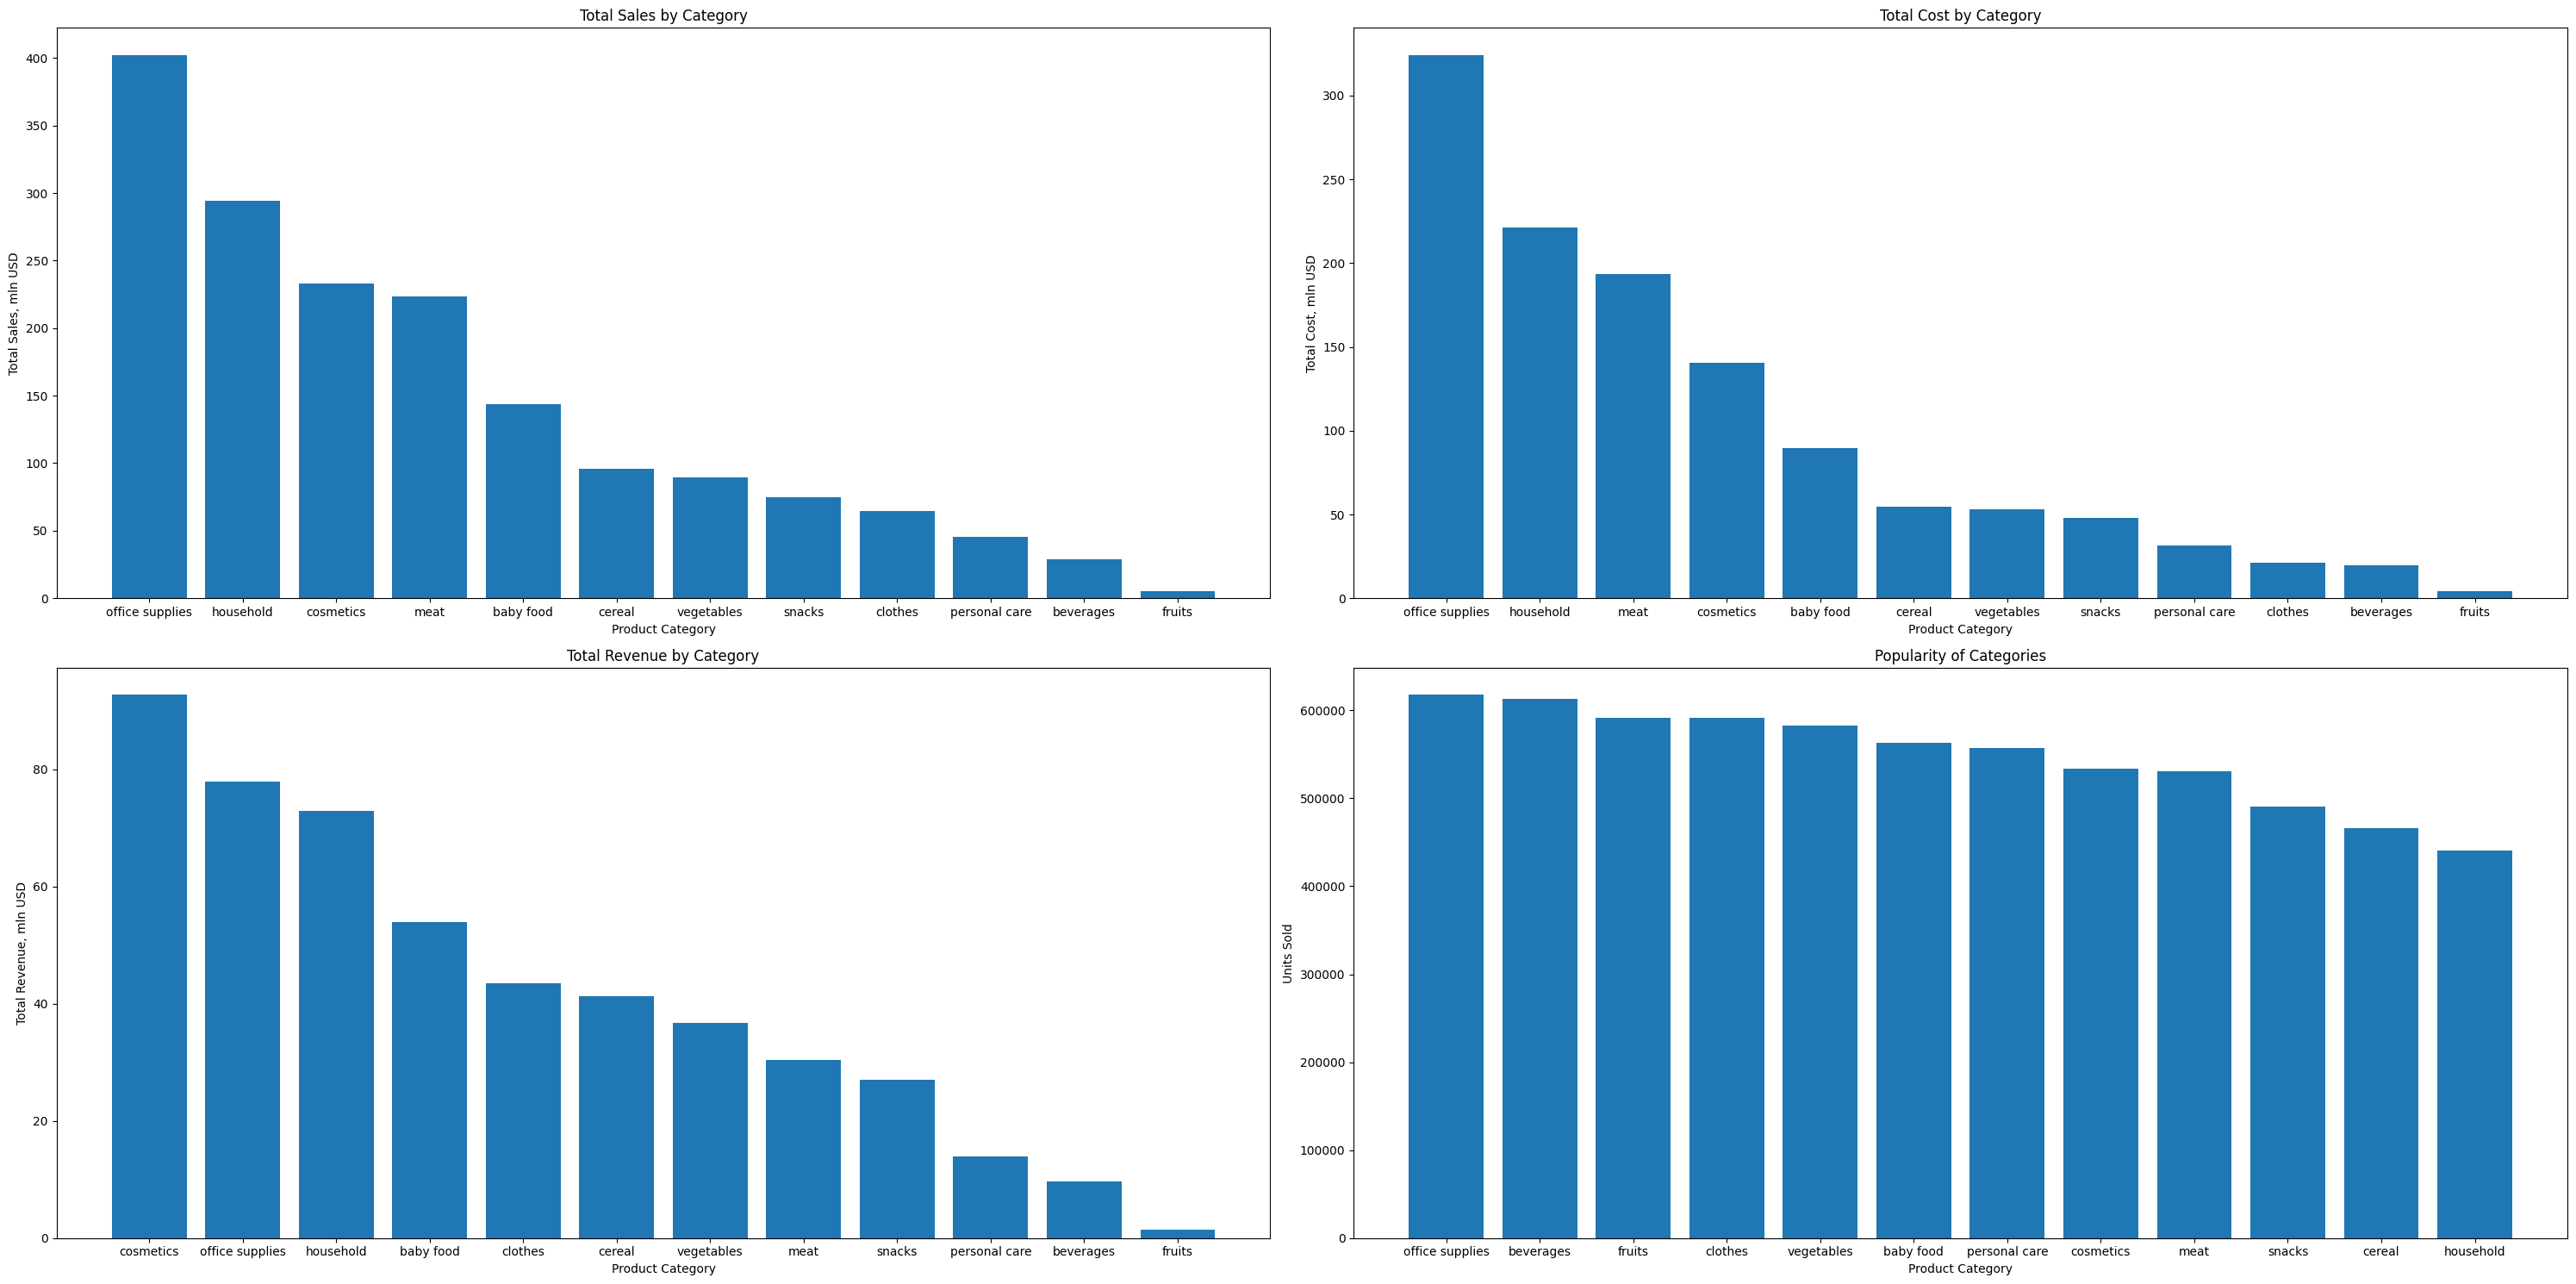

In [50]:
# створюю масив графіків для аналізу доходів, витрат, прибутку, популярності товарів в розрізі категорій товарів

fig, ax = plt.subplots(2, 2, figsize=(30, 15))

# виручка за категоріями для першого графіку
sales_groupby = merged_df.groupby("item_type")["sales_amount"].sum().sort_values(ascending=False)
df = pd.DataFrame(sales_groupby)

# створюємо перший графік
ax[0, 0].bar(x = df.index, height = df["sales_amount"]/1000000)
ax[0, 0].set_title("Total Sales by Category")  # Title of the graph
ax[0, 0].set_xlabel("Product Category")  # X-axis label
ax[0, 0].set_ylabel("Total Sales, mln USD")  # Y-axis label

# собівартість за категоріями для другого графіку
cost_groupby = merged_df.groupby("item_type")["cost_amount"].sum().sort_values(ascending=False)
df1 = pd.DataFrame(cost_groupby)

# створюємо другий графік
ax[0, 1].bar(x = df1.index, height = df1["cost_amount"]/1000000)
ax[0, 1].set_title("Total Cost by Category")  # Title of the graph
ax[0, 1].set_xlabel("Product Category")  # X-axis label
ax[0, 1].set_ylabel("Total Cost, mln USD")  # Y-axis label

# прибуток за категоріями для третього графіку
revenue_groupby = merged_df.groupby("item_type")["revenue_amount"].sum().sort_values(ascending=False)
df2 = pd.DataFrame(revenue_groupby)

# створюємо третій графік
ax[1, 0].bar(x = df2.index, height = df2["revenue_amount"]/1000000)
ax[1, 0].set_title("Total Revenue by Category")  # Title of the graph
ax[1, 0].set_xlabel("Product Category")  # X-axis label
ax[1, 0].set_ylabel("Total Revenue, mln USD")  # Y-axis label

# популярність за категоріями для четвертого графіку
item_groupby = merged_df.groupby("item_type")["units_sold"].sum().sort_values(ascending=False)
df3 = pd.DataFrame(item_groupby)

# створюємо четвертий графік
ax[1, 1].bar(x = df3.index, height = df3["units_sold"])
ax[1, 1].set_title("Popularity of Categories")  # Title of the graph
ax[1, 1].set_xlabel("Product Category")  # X-axis label
ax[1, 1].set_ylabel("Units Sold")  # Y-axis label

# відображаємо графік
plt.tight_layout()
plt.show()

Найпопулярніші категорії товарів підприємства це офісне приладдя, пиво, фрукти, одяг та овочі. При цьому найбільшу виручку компанії приносять офісне приладдя, побутові речі, косметика, мясо та дитяча їжа. Перелік товарів, які приносять компанії найбільший прибуток відрізняється від попереднього, найбільш прибутковими є косметика, офісне приладдя, побутові речі, дитяча їжа та одяг.
Косметика не входить в топ 5 популярних товарів, вона посідає 8 місце, при цьому приносить найбільший прибуток, що свідчить про великий розмір націнки на цю категорію товарів.

**Візуалізація основних показників діяльності компанії у розрізі країн:**

In [51]:
#для коректного аналізу показників у розрізі країн та регіонів видаляю рядки, де невідома назва країни, або регіону.
merged_df_for_countries = merged_df.replace("Unknown", np.nan).dropna()
merged_df_for_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1327
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         1246 non-null   object        
 1   region          1246 non-null   object        
 2   sub-region      1246 non-null   object        
 3   order_id        1246 non-null   int64         
 4   order_date      1246 non-null   datetime64[ns]
 5   ship_date       1246 non-null   datetime64[ns]
 6   order_priority  1246 non-null   object        
 7   product_id      1246 non-null   int64         
 8   sales_channel   1246 non-null   object        
 9   units_sold      1246 non-null   float64       
 10  unit_price      1246 non-null   float64       
 11  unit_cost       1246 non-null   float64       
 12  item_type       1246 non-null   object        
 13  sales_amount    1246 non-null   float64       
 14  cost_amount     1246 non-null   float64       
 15  revenue_a

In [52]:
item_groupby = merged_df_for_countries.groupby("country")["sales_amount"].sum().sort_values(ascending=False)
df = pd.DataFrame(item_groupby)
print(df)

                        sales_amount
country                             
czech republic           53543932.14
ukraine                  53252317.54
bosnia and herzegovina   50117508.49
macedonia                49222085.25
san marino               47883708.48
andorra                  47756693.17
portugal                 47172189.84
malta                    47145320.81
russia                   46051659.81
slovakia                 42940998.32
hungary                  42408249.12
serbia                   42193537.74
france                   39362112.15
slovenia                 38892531.27
latvia                   38722084.15
greece                   38699541.70
bulgaria                 38161555.70
germany                  38055087.56
armenia                  37519840.21
italy                    35878352.12
austria                  35740871.49
sweden                   35482128.02
romania                  34286150.85
belarus                  34236260.77
poland                   33805403.22
l

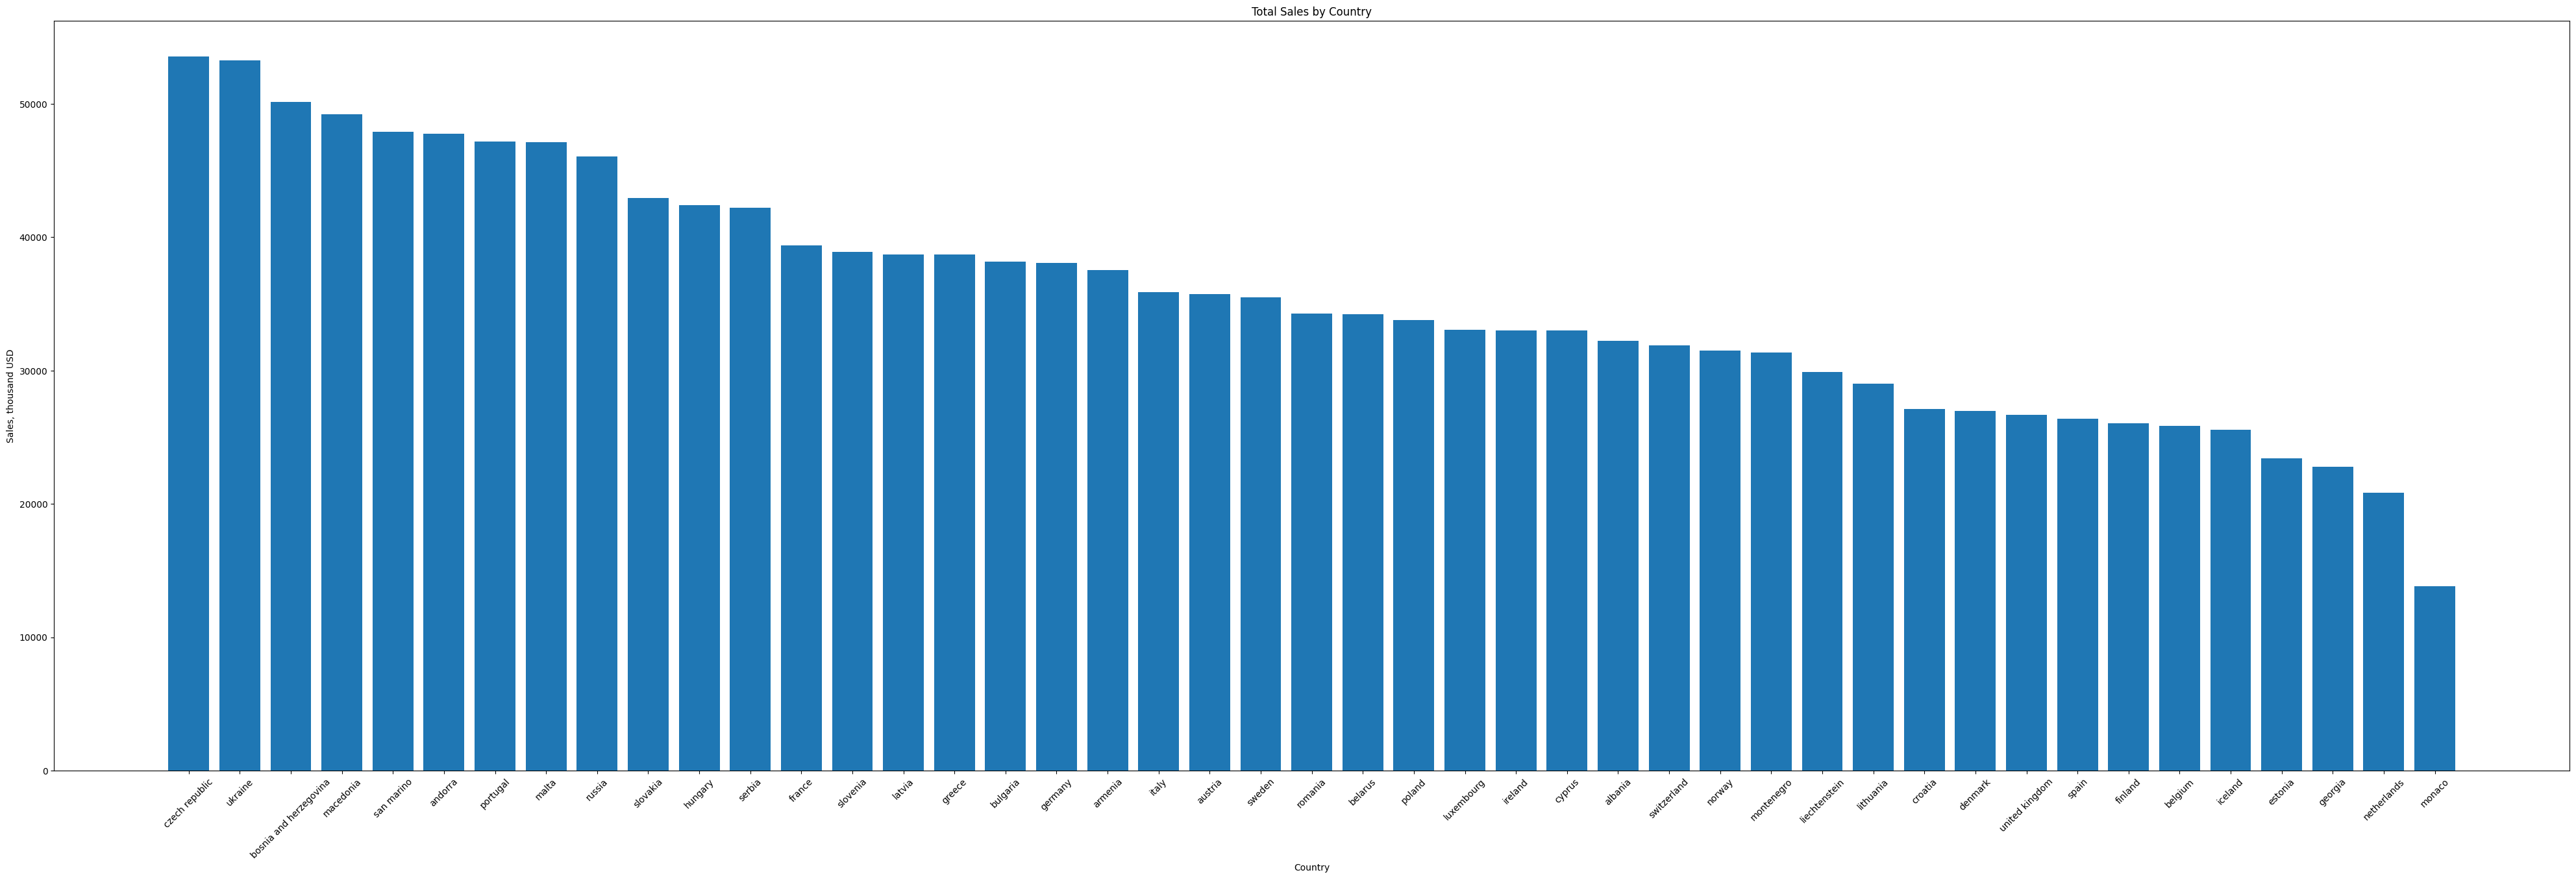

In [53]:
# виручка у розрізі країн
item_groupby = merged_df_for_countries.groupby("country")["sales_amount"].sum().sort_values(ascending=False)
df = pd.DataFrame(item_groupby)

plt.figure(figsize=(50, 15))

# створюємо графік
plt.bar(x = df.index, height = df["sales_amount"]/1000)

# додаємо заголовок та мітки
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Sales, thousand USD")

# відображаємо графік
plt.xticks(rotation=45)
plt.show()


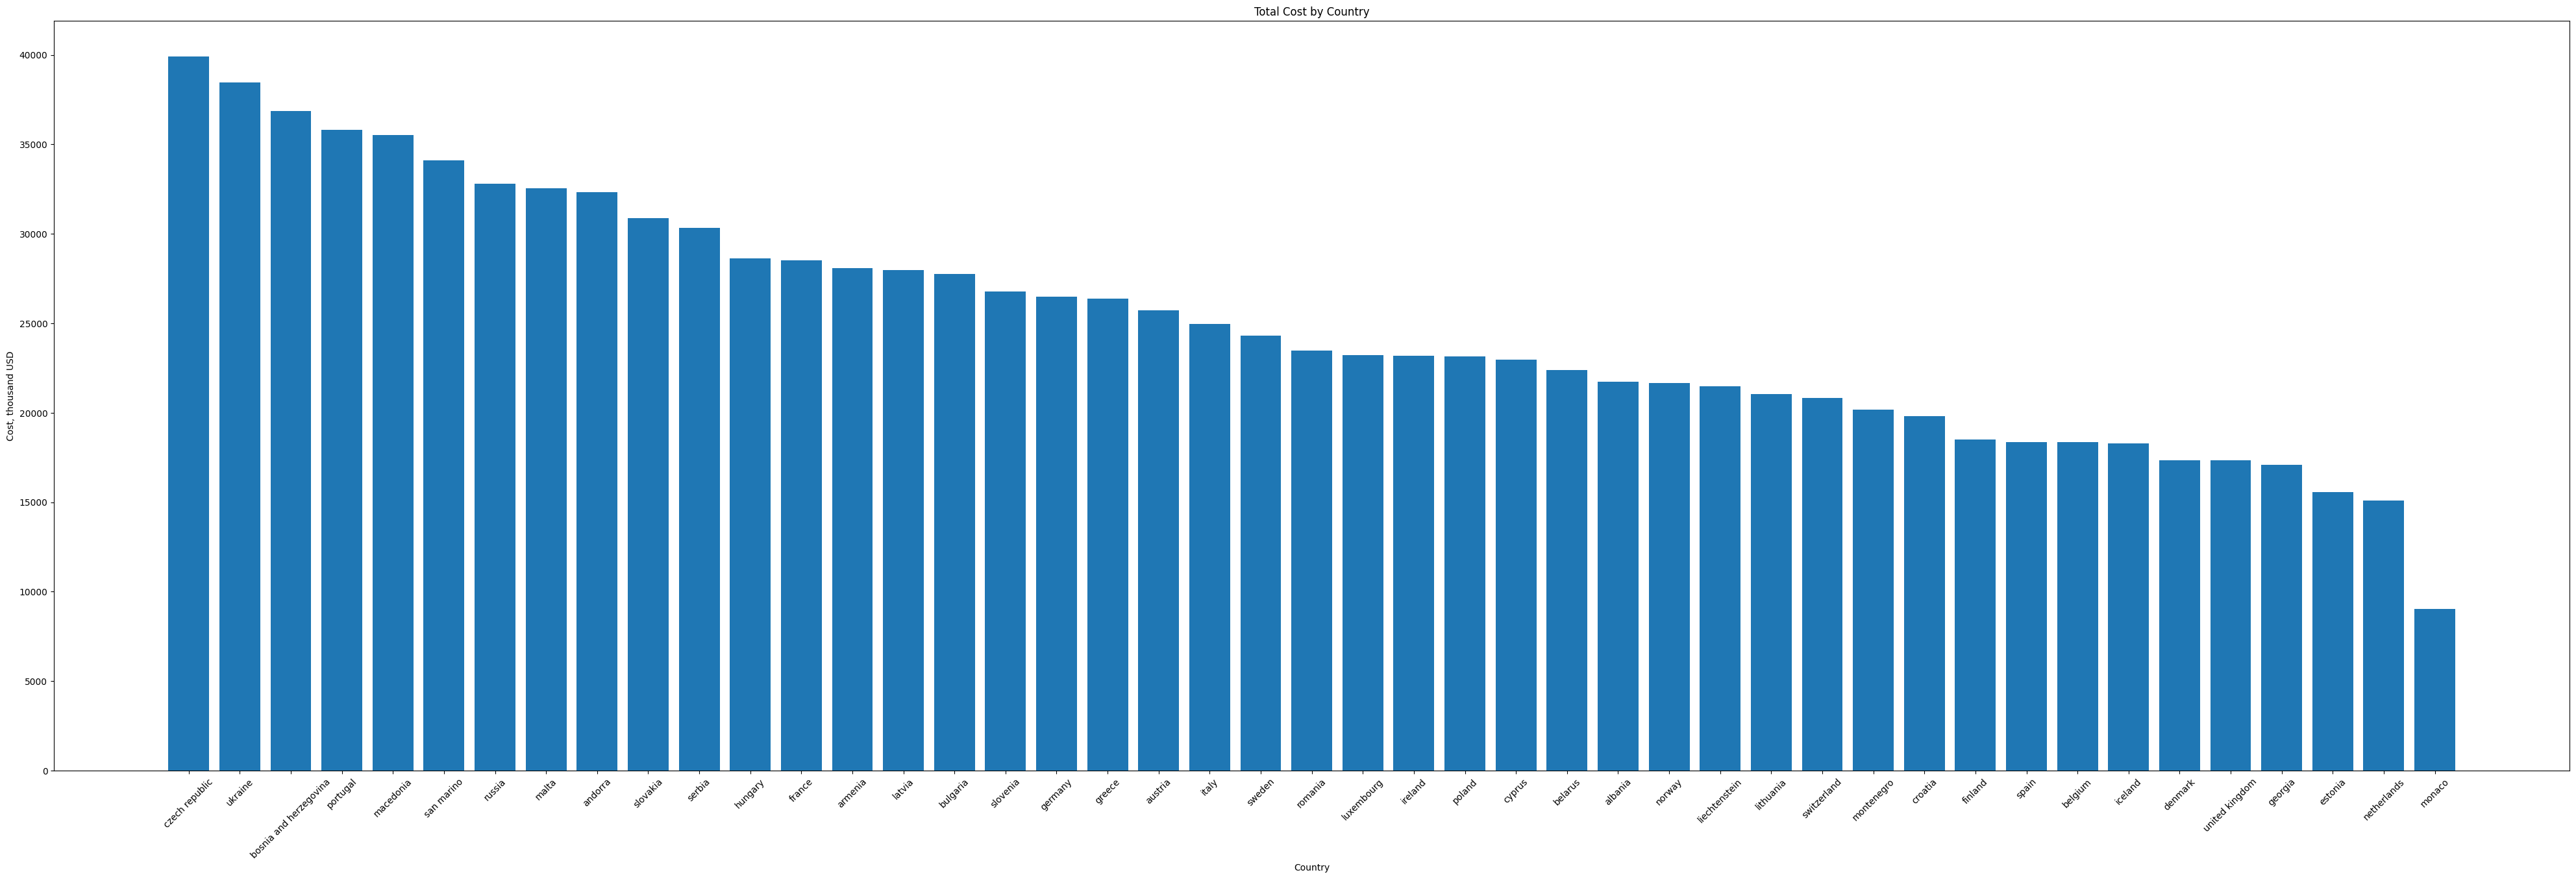

In [54]:
# собівартість у розрізі країн
item_groupby = merged_df_for_countries.groupby("country")["cost_amount"].sum().sort_values(ascending=False)
df = pd.DataFrame(item_groupby)

plt.figure(figsize=(50, 15))

# створюємо графік
plt.bar(x = df.index, height = df["cost_amount"]/1000)

# додаємо заголовок та мітки
plt.title("Total Cost by Country")
plt.xlabel("Country")
plt.ylabel("Cost, thousand USD")

# відображаємо графік
plt.xticks(rotation=45)
plt.show()

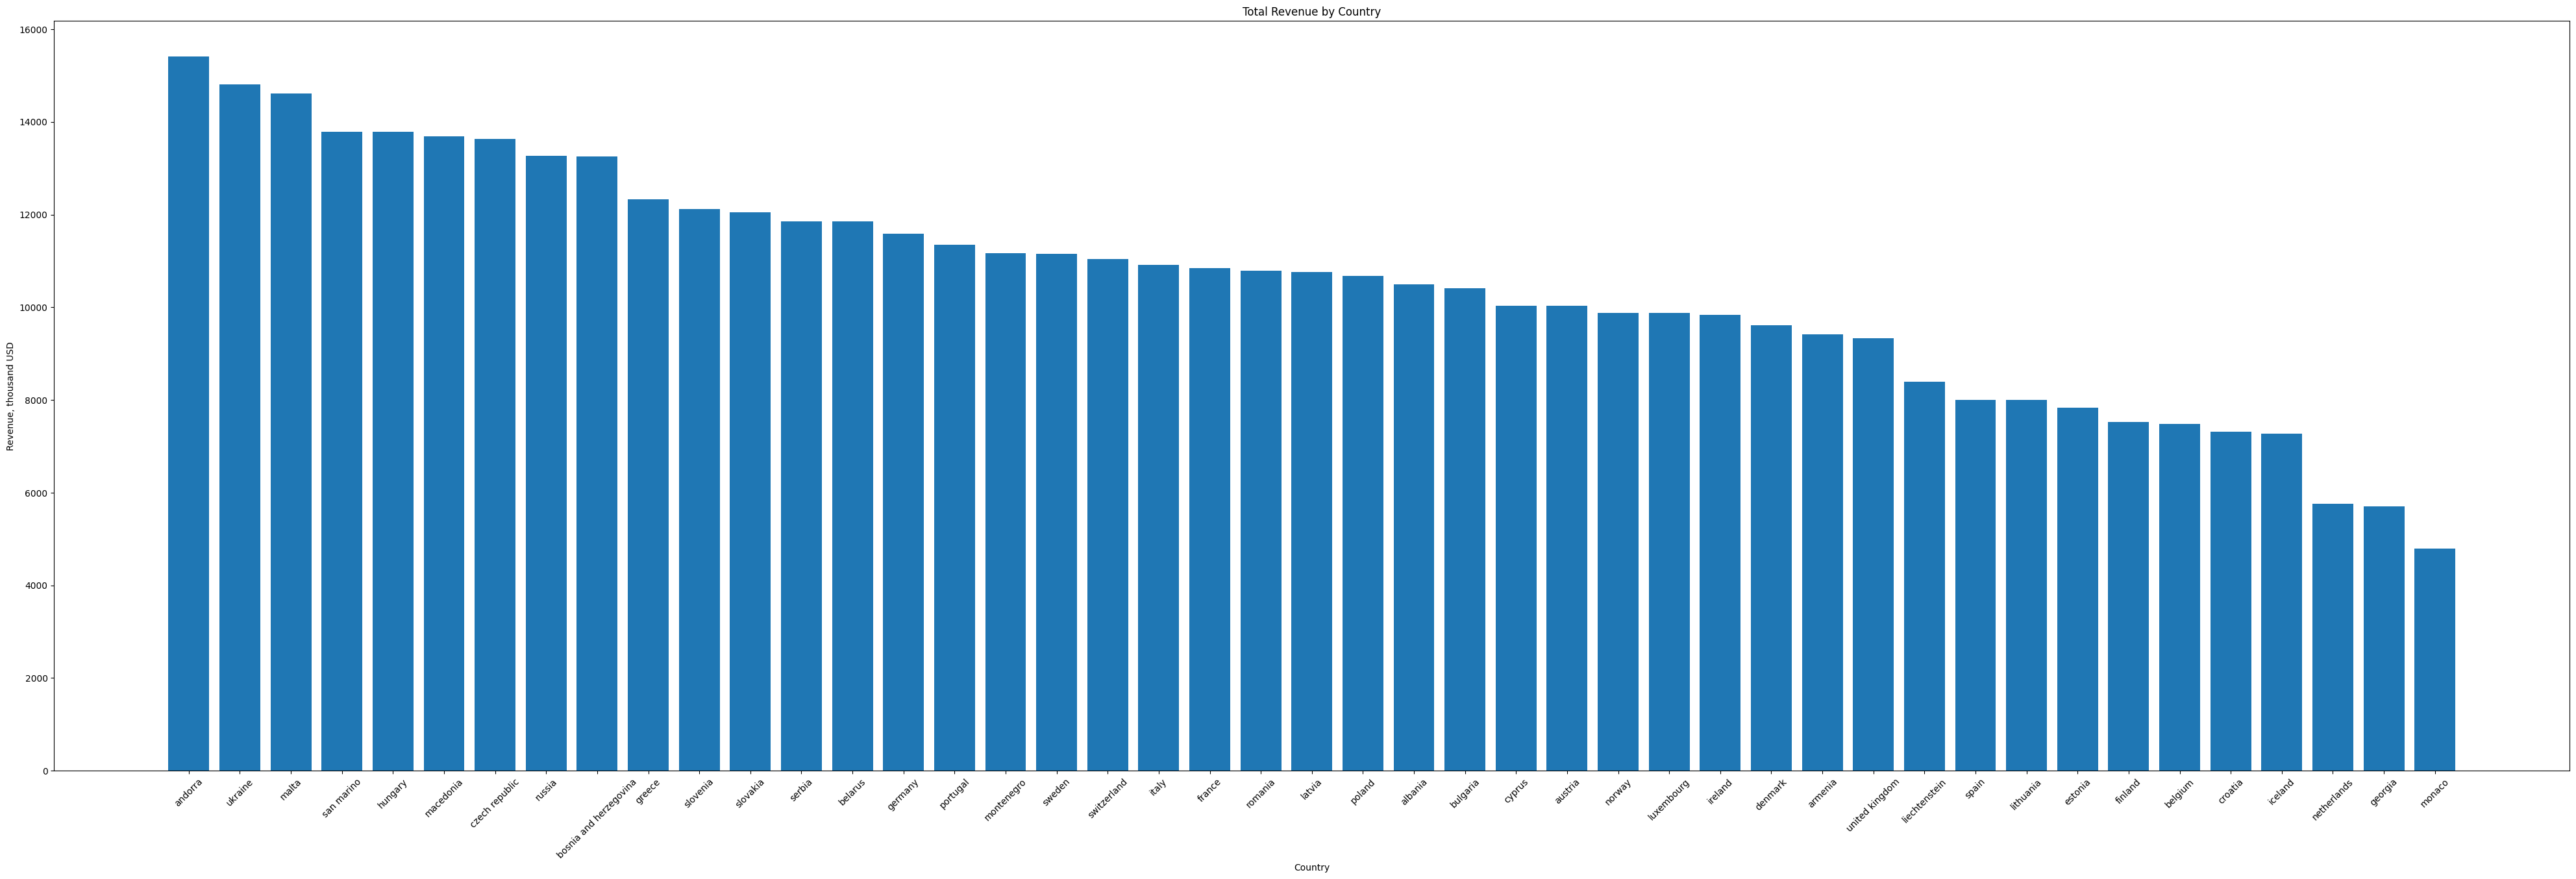

In [55]:
# прибуток у розрізі країн
item_groupby = merged_df_for_countries.groupby("country")["revenue_amount"].sum().sort_values(ascending=False)
df = pd.DataFrame(item_groupby)

plt.figure(figsize=(50, 15))

# створюємо графік
plt.bar(x = df.index, height = df["revenue_amount"]/1000)

# додаємо заголовок та мітки
plt.title("Total Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Revenue, thousand USD")

# відображаємо графік
plt.xticks(rotation=45)
plt.show()

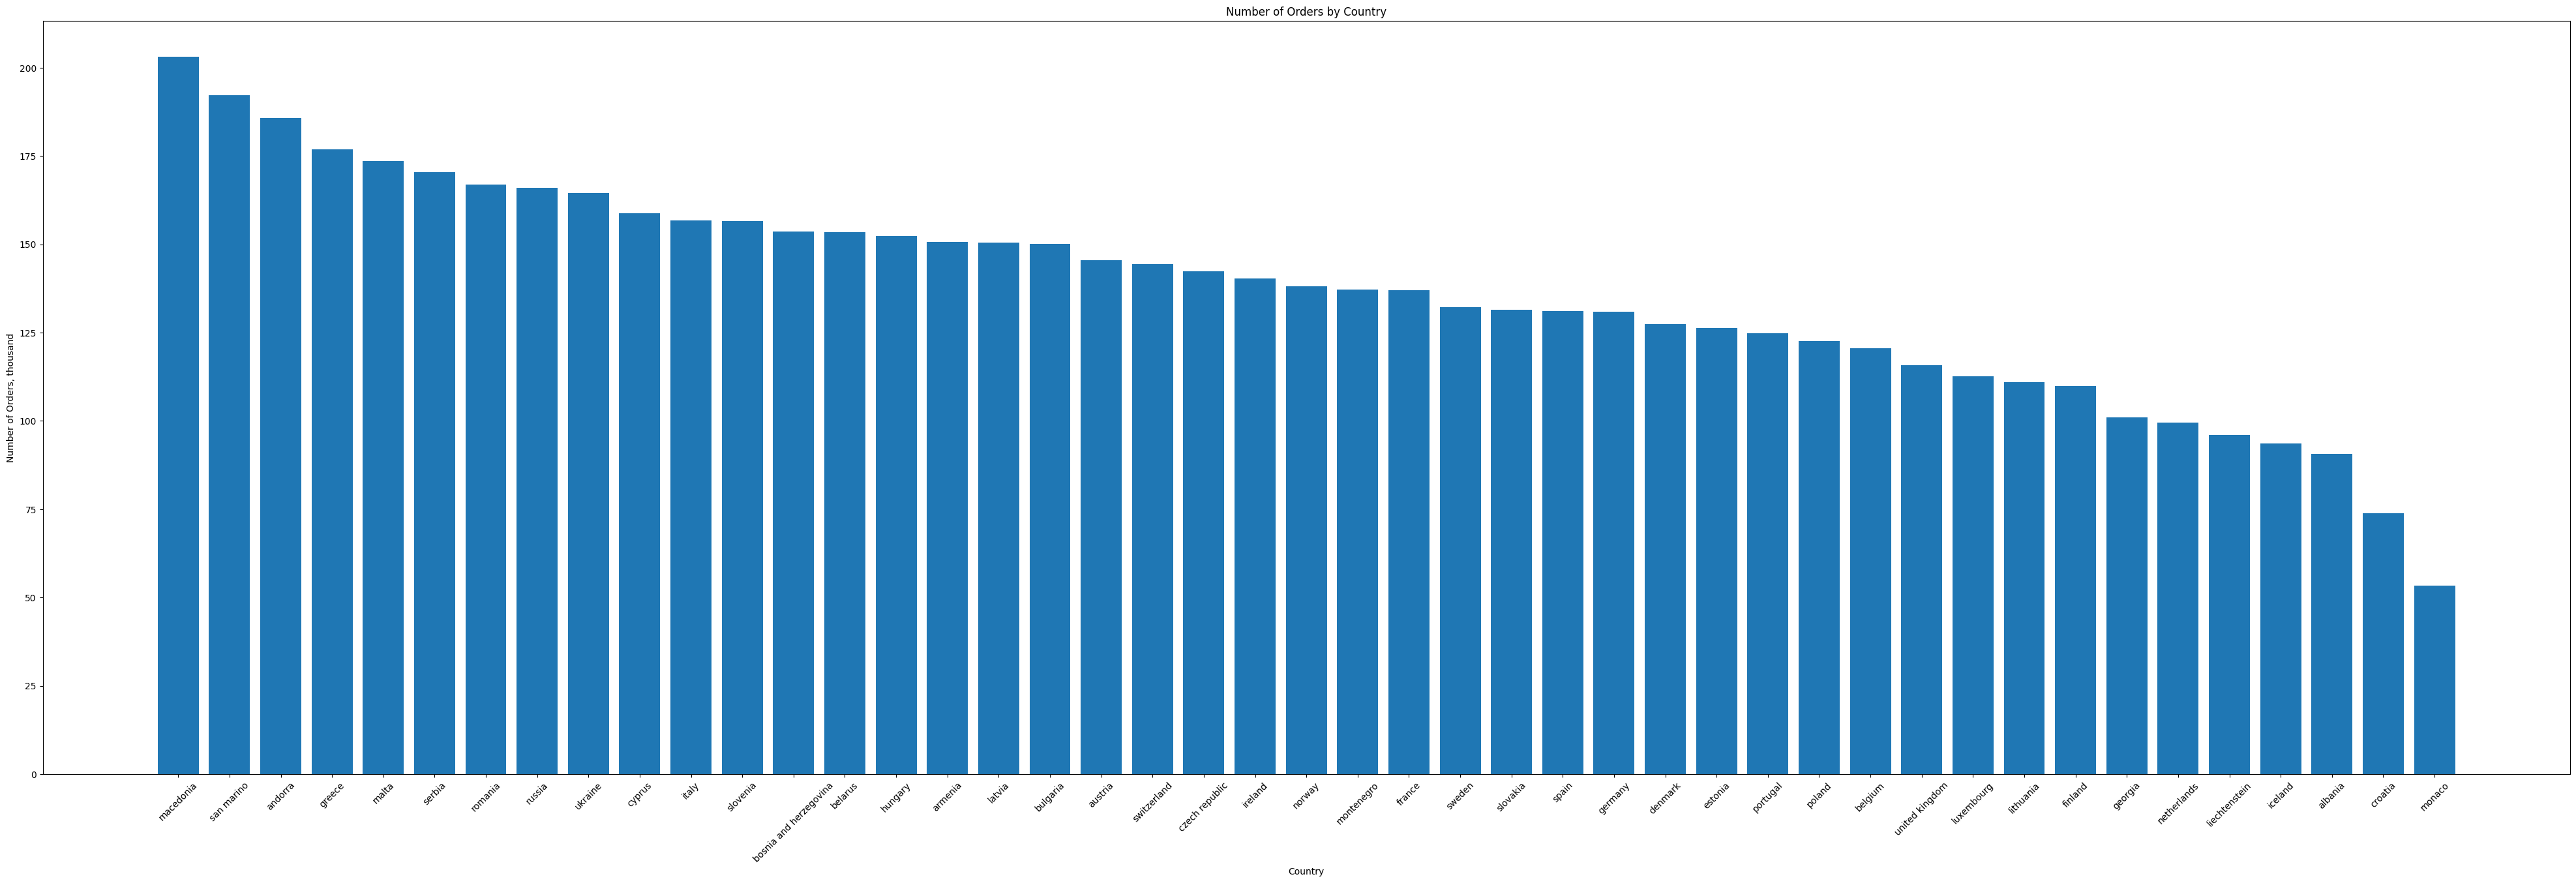

In [56]:
# кількість продажів товарів у розрізі країн
item_groupby = merged_df_for_countries.groupby("country")["units_sold"].sum().sort_values(ascending=False)
df = pd.DataFrame(item_groupby)

plt.figure(figsize=(50, 15))

# створюємо графік
plt.bar(x = df.index, height = df["units_sold"]/1000)

# додаємо заголовок та мітки
plt.title("Number of Orders by Country")
plt.xlabel("Country")
plt.ylabel("Number of Orders, thousand")

# відображаємо графік
plt.xticks(rotation=45)
plt.show()


Найбільшу виручку компанія отримає від продажів у наступні країни: Чехія, Україна, Боснія та герцоговина, Македонія та Сан Маріно. При цьобу найбільший прибуток приносять наступні країни: Андора, Україна, Мальта, Сан Маріно та Угорщина. Монако посідає останнє місце за рівнем виручки та прибутку.
Найбільша кількість товарів реалізується у Македонію, Сан Маріно  Андору, Грецію та Мальту.


**Візуалізація основних показників діяльності компанії у розрізі регіонів:**

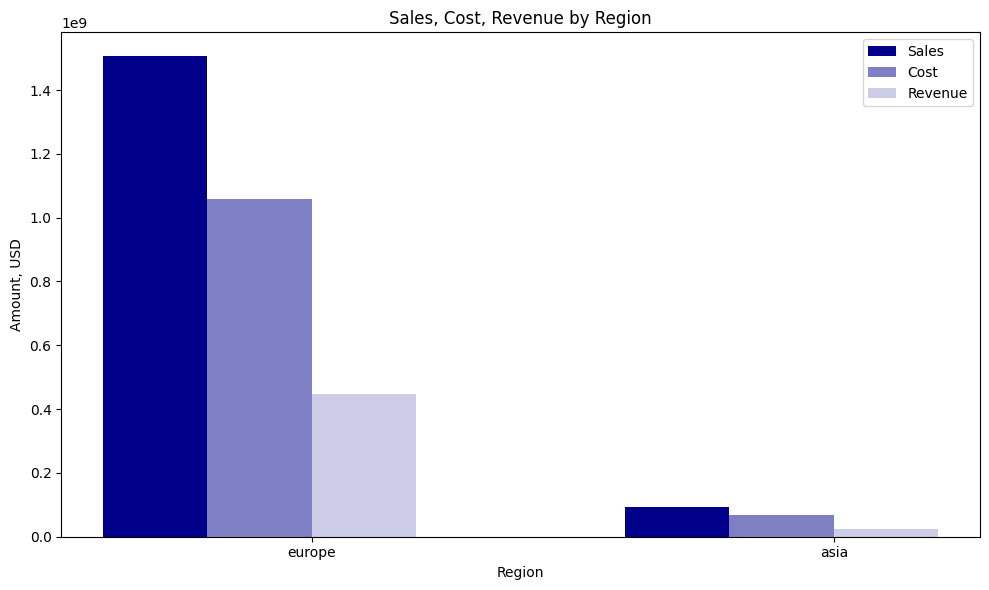

In [57]:
# групуємо основні показники діяльності у розрізі регонів
sales_groupby = merged_df_for_countries.groupby("region")["sales_amount"].sum()
cost_groupby = merged_df_for_countries.groupby("region")["cost_amount"].sum()
revenue_groupby = merged_df_for_countries.groupby("region")["revenue_amount"].sum()

# задаємо необхідний порядок регіонів
desired_order = ["europe", "asia"] + [region for region in sales_groupby.index if region not in ["europe", "asia"]]

# змінюємо індекс в результаттах групування
sales_groupby = sales_groupby.reindex(desired_order)
cost_groupby = cost_groupby.reindex(desired_order)
revenue_groupby = revenue_groupby.reindex(desired_order)

# задаємо індекс
regions = sales_groupby.index

#  задаємо ширину стовпців
width = 0.2

#  задаємо числові позиції для осі X
x_positions = np.arange(len(regions))

# створюємо графік
fig, ax = plt.subplots(figsize=(10, 6))

# створюємо стовпці для кожної категорії
ax.bar(x_positions - width*1.5, sales_groupby, width, label="Sales", color="darkblue")
ax.bar(x_positions - width*0.5, cost_groupby, width, label="Cost", color="darkblue", alpha = 0.5)
ax.bar(x_positions + width*0.5, revenue_groupby, width, label="Revenue", color="darkblue", alpha = 0.2)

# додаємо мітки на осі X для регіонів
ax.set_xticks(x_positions)
ax.set_xticklabels(regions)

# додаємо заголовок та мітки
ax.set_title("Sales, Cost, Revenue by Region")
ax.set_xlabel("Region")
ax.set_ylabel("Amount, USD")

# легенда
ax.legend()

# відображаємо графік
plt.tight_layout()
plt.show()


In [58]:
sales_groupby = merged_df_for_countries.groupby("region")["sales_amount"].sum()
percent_of_total = sales_groupby/merged_df_for_countries["sales_amount"].sum()*100
percent_of_total

,sales_amount
region,
asia,5.836888
europe,94.163112


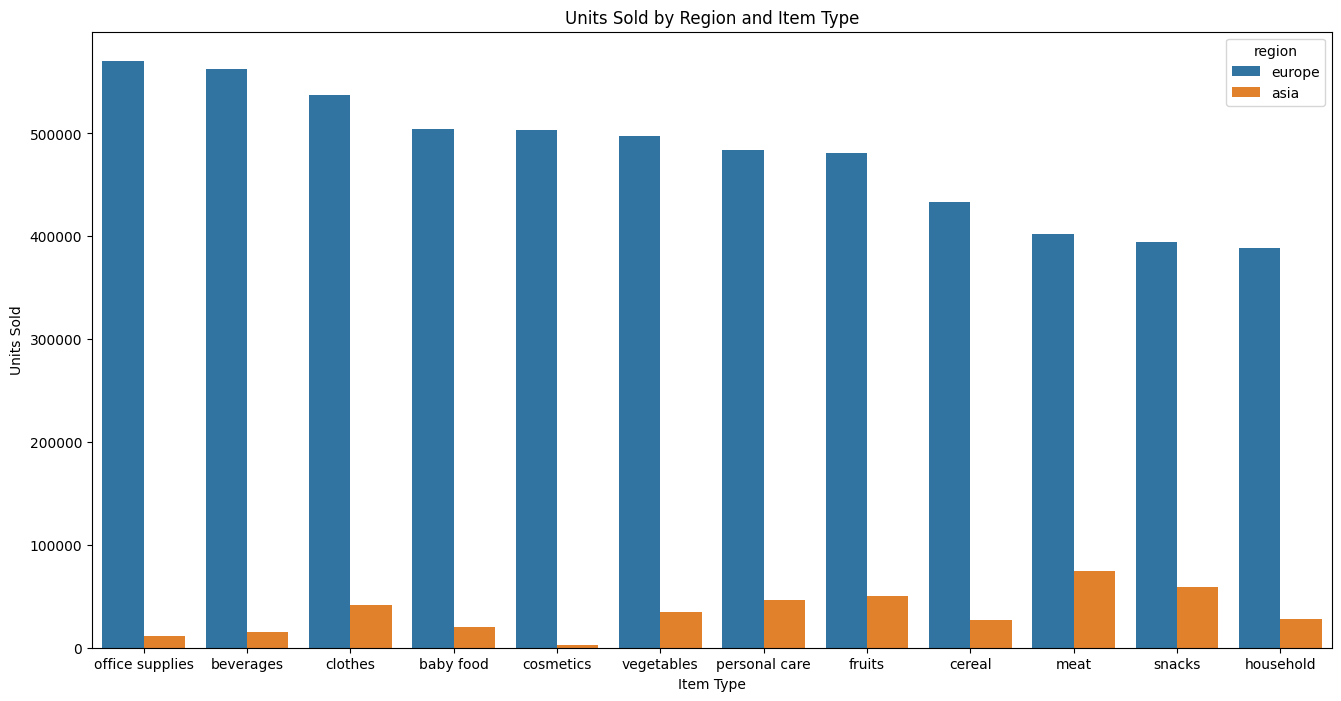

In [59]:
# популярність товарів у розрізі регіонів
item_groupby = merged_df_for_countries.groupby(["item_type", "region"])["units_sold"].sum().sort_values(ascending=False).reset_index()
df1 = pd.DataFrame(item_groupby)

# створюємо графік
plt.figure(figsize=(16, 8))
sns.barplot(data=df1, x='item_type', y='units_sold', hue='region')

#  додаємо заголовок та мітки
plt.title('Units Sold by Region and Item Type')
plt.xlabel('Item Type')
plt.ylabel('Units Sold')

# відображаємо графік
plt.show()


Популярність товарів у розрізі регіонів відрізняється. У Азії найбільшим попитом користується мясо, снеки та фрукти, у Європі офісне приладдя, пиво та одяг.

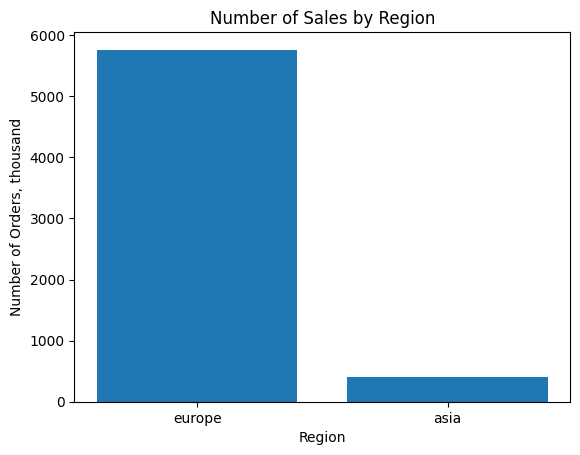

In [60]:
# кількість продажів товарів у розрізі регіонів
item_groupby = merged_df_for_countries.groupby("region")["units_sold"].sum().sort_values(ascending=False)
df = pd.DataFrame(item_groupby)

# створюємо графік
plt.bar(x = df.index, height = df["units_sold"]/1000)

# додаємо заголовок та мітки
plt.title("Number of Sales by Region")  # Title of the graph
plt.xlabel("Region")  # X-axis label
plt.ylabel("Number of Orders, thousand")  # Y-axis label

# відображаємо графік
plt.show()


Основні продажі компанія здійснює у Європу. Вона лідирує за показниками виручки та прибутку, частка продажів складає 94%.

**Візуалізація основних показників діяльності компанії у розрізі каналів продажу:**

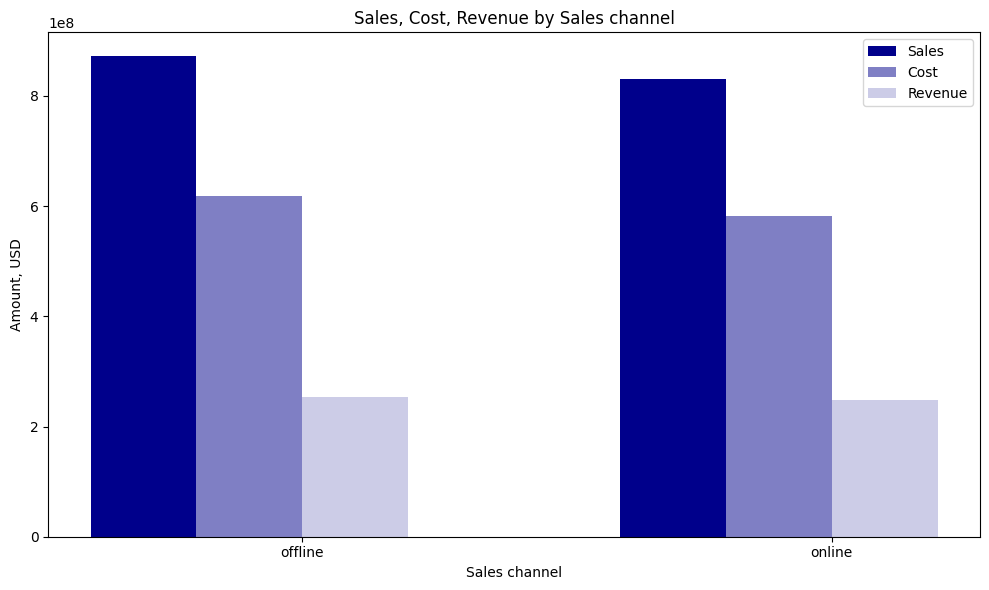

In [61]:
# групуємо основні показники діяльності у розрізі регонів
sales_groupby = merged_df.groupby("sales_channel")["sales_amount"].sum()
cost_groupby = merged_df.groupby("sales_channel")["cost_amount"].sum()
revenue_groupby = merged_df.groupby("sales_channel")["revenue_amount"].sum()

# задаємо індекс
regions = sales_groupby.index

#  задаємо ширину стовпців
width = 0.2

#  задаємо числові позиції для осі X
x_positions = np.arange(len(regions))

# створюємо графік
fig, ax = plt.subplots(figsize=(10, 6))

# створюємо стовпці для кожної категорії
ax.bar(x_positions - width*1.5, sales_groupby, width, label="Sales", color="darkblue")
ax.bar(x_positions - width*0.5, cost_groupby, width, label="Cost", color="darkblue", alpha = 0.5)
ax.bar(x_positions + width*0.5, revenue_groupby, width, label="Revenue", color="darkblue", alpha = 0.2)

# додаємо мітки на осі X для регіонів
ax.set_xticks(x_positions)
ax.set_xticklabels(regions)

# додаємо заголовок та мітки
ax.set_title("Sales, Cost, Revenue by Sales channel")
ax.set_xlabel("Sales channel")
ax.set_ylabel("Amount, USD")

# легенда
ax.legend()

# відображаємо графік
plt.tight_layout()
plt.show()

Продажі компанії практично рівномірно розподіляються між двома каналами продажу (офлайн та онлайн).

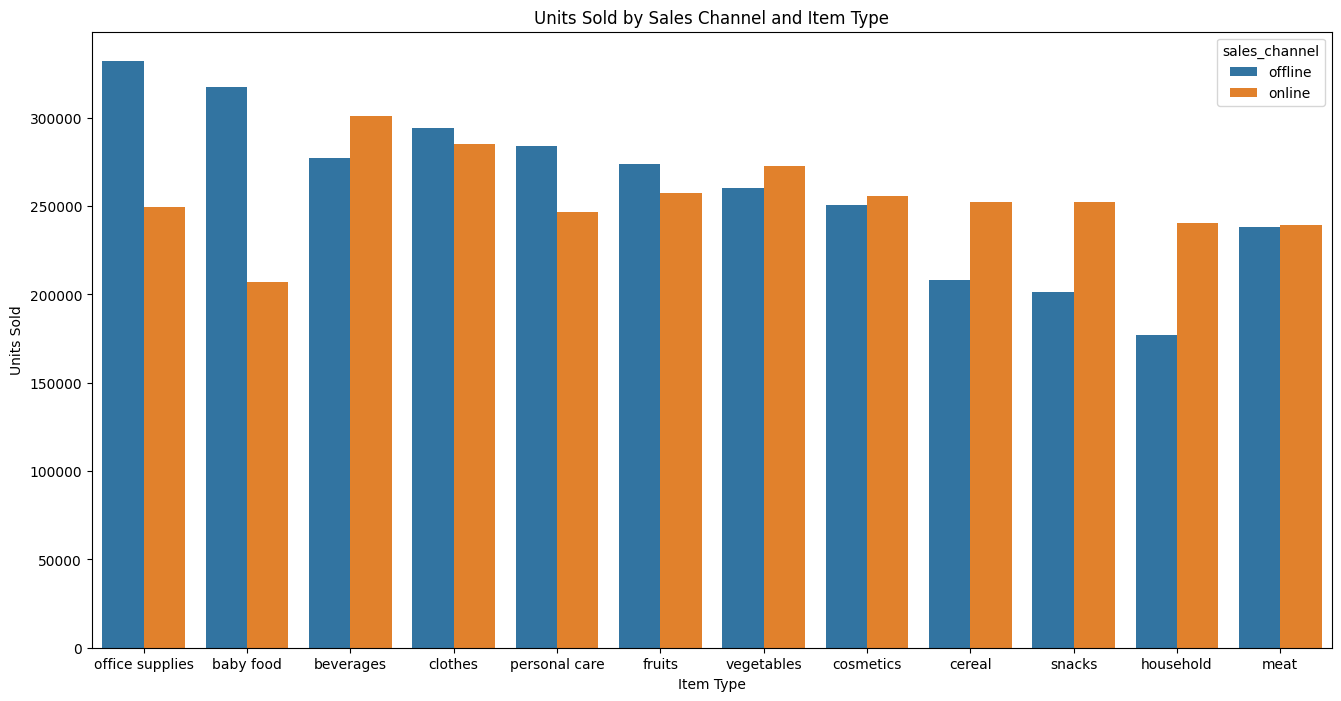

In [62]:
# популярність товарів у розрізі каналів продажу
item_groupby = merged_df_for_countries.groupby(["item_type", "sales_channel"])["units_sold"].sum().sort_values(ascending=False).reset_index()
df2 = pd.DataFrame(item_groupby)

# створюємо графік
plt.figure(figsize=(16, 8))
sns.barplot(data=df2, x='item_type', y='units_sold', hue='sales_channel')

#  додаємо заголовок та мітки
plt.title('Units Sold by Sales Channel and Item Type')
plt.xlabel('Item Type')
plt.ylabel('Units Sold')

# відображаємо графік
plt.show()

Популярність товарів у розрізі каналів продажу має свої відмінності: офісне приладдя, дитячу їжу та засоби особистої гігієни найчастіше купують офлайн, а пиво, крупи та снеки - онлайн.

#####Visualization of aging

In [63]:
# додаємо стовпці із розрахунком різниці в часі
merged_df["aging"] = (merged_df["ship_date"] - merged_df["order_date"]).dt.days
merged_df["aging"] = merged_df["aging"].astype(int)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         1328 non-null   object        
 1   region          1328 non-null   object        
 2   sub-region      1328 non-null   object        
 3   order_id        1328 non-null   int64         
 4   order_date      1328 non-null   datetime64[ns]
 5   ship_date       1328 non-null   datetime64[ns]
 6   order_priority  1328 non-null   object        
 7   product_id      1328 non-null   int64         
 8   sales_channel   1328 non-null   object        
 9   units_sold      1328 non-null   float64       
 10  unit_price      1328 non-null   float64       
 11  unit_cost       1328 non-null   float64       
 12  item_type       1328 non-null   object        
 13  sales_amount    1328 non-null   float64       
 14  cost_amount     1328 non-null   float64       
 15  reve

In [64]:
merged_df.head()

,country,region,sub-region,order_id,order_date,ship_date,order_priority,product_id,sales_channel,units_sold,unit_price,unit_cost,item_type,sales_amount,cost_amount,revenue_amount,aging
0,norway,europe,northern europe,100640618,2014-10-08,2014-10-18,m,2103,online,650.0,205.70,117.11,cereal,133705.00,76121.50,57583.50,10
1,serbia,europe,southern europe,100983083,2016-08-11,2016-08-11,c,2103,offline,1993.0,205.70,117.11,cereal,409960.10,233400.23,176559.87,0
2,Unknown,Unknown,Unknown,101025998,2014-07-18,2014-08-11,m,7940,online,4693.0,668.27,502.54,household,3136191.11,2358420.22,777770.89,24
3,montenegro,europe,southern europe,102230632,2017-05-13,2017-06-13,l,2455,online,1171.0,109.28,35.84,clothes,127966.88,41968.64,85998.24,31
4,serbia,europe,southern europe,103435266,2012-08-11,2012-09-18,h,1270,offline,7648.0,47.45,31.79,beverages,362897.60,243129.92,119767.68,38


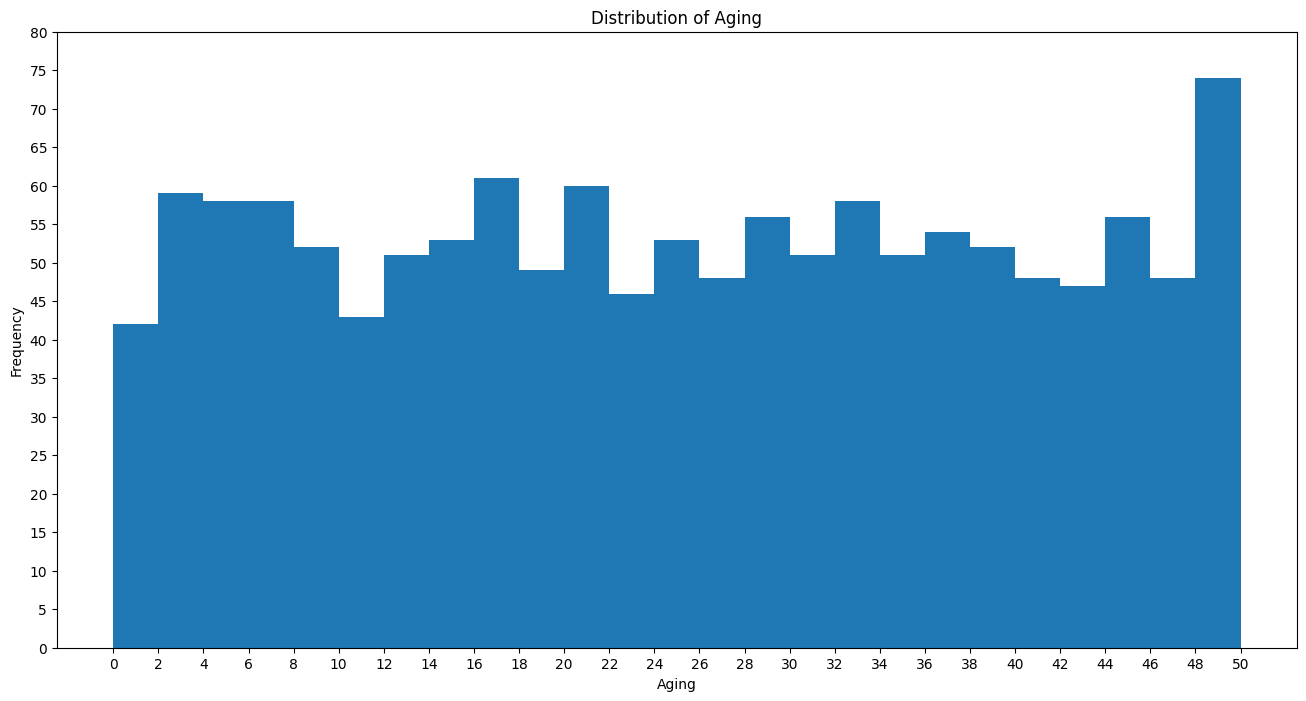

In [65]:
# аналіз розподілу інтервалу між замовленням та його виконанням

# створюємо графік
plt.figure(figsize=(16, 8))
plt.hist(merged_df["aging"], bins=25)

#  додаємо заголовок та мітки
plt.title("Distribution of Aging")
plt.xlabel("Aging")
plt.ylabel("Frequency")

# задаємо параметри
x_ticks = np.arange(0, merged_df["aging"].max() + 2, 2)
plt.xticks(x_ticks)

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 5, 5)
plt.yticks(y_ticks)

# відображаємо графік
plt.show()

**Візуалізація інтервалу часу між замовленням та його відвантаженням в розрізі категорій товарів**

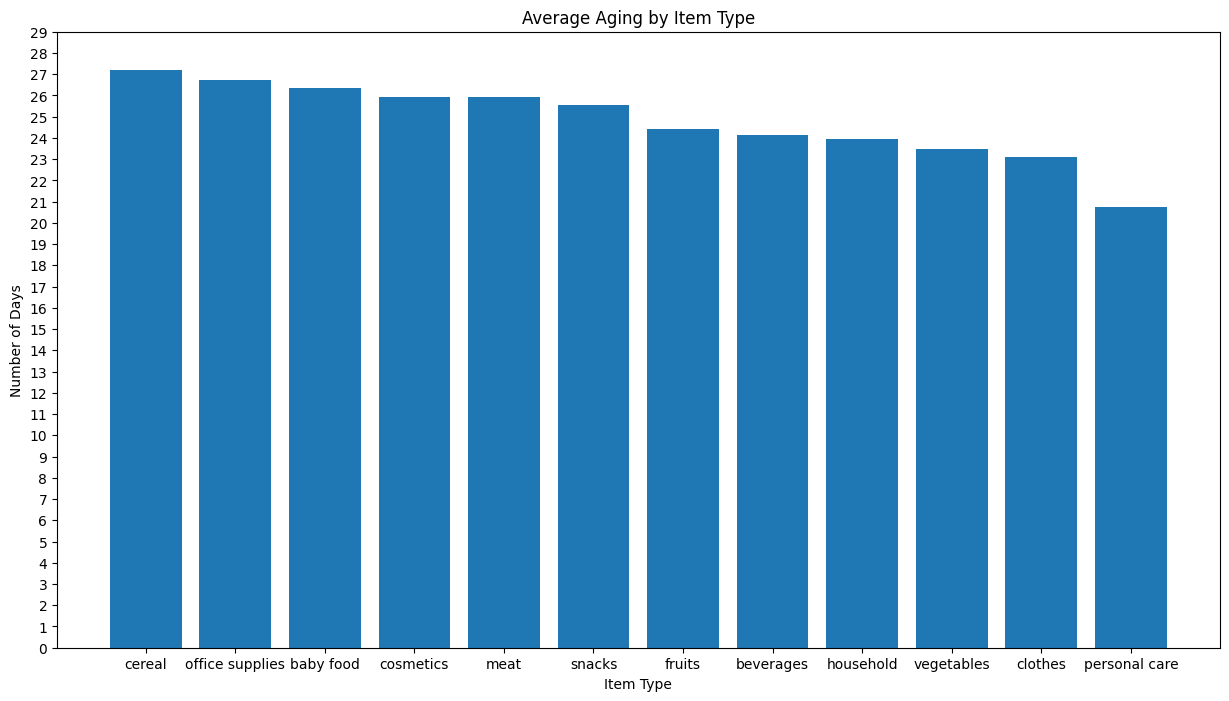

In [66]:
# інтервал часу між замовленням та його відвантаженням у розрізі категорій товару
item_groupby = merged_df.groupby("item_type")["aging"].mean().sort_values(ascending=False)
df = pd.DataFrame(item_groupby)

plt.figure(figsize=(15, 8))

# створюємо графік
plt.bar(x = df.index, height = df["aging"])

# додаємо заголовок та мітки
plt.title("Average Aging by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Number of Days")

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 1, 1)
plt.yticks(y_ticks)

# відображаємо графік
plt.show()

В середньому доставка товарів займає від 22 до 27 днів.


**Візуалізація інтервалу часу між замовленням та його відвантаженням в розрізі країн**

In [67]:
# додаємо стовпці із розрахунком різниці в часі
merged_df_for_countries["aging"] = (merged_df_for_countries["ship_date"] - merged_df_for_countries["order_date"]).dt.days
merged_df_for_countries["aging"] = merged_df_for_countries["aging"].astype(int)
merged_df_for_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         1246 non-null   object        
 1   region          1246 non-null   object        
 2   sub-region      1246 non-null   object        
 3   order_id        1246 non-null   int64         
 4   order_date      1246 non-null   datetime64[ns]
 5   ship_date       1246 non-null   datetime64[ns]
 6   order_priority  1246 non-null   object        
 7   product_id      1246 non-null   int64         
 8   sales_channel   1246 non-null   object        
 9   units_sold      1246 non-null   float64       
 10  unit_price      1246 non-null   float64       
 11  unit_cost       1246 non-null   float64       
 12  item_type       1246 non-null   object        
 13  sales_amount    1246 non-null   float64       
 14  cost_amount     1246 non-null   float64       
 15  revenue_a

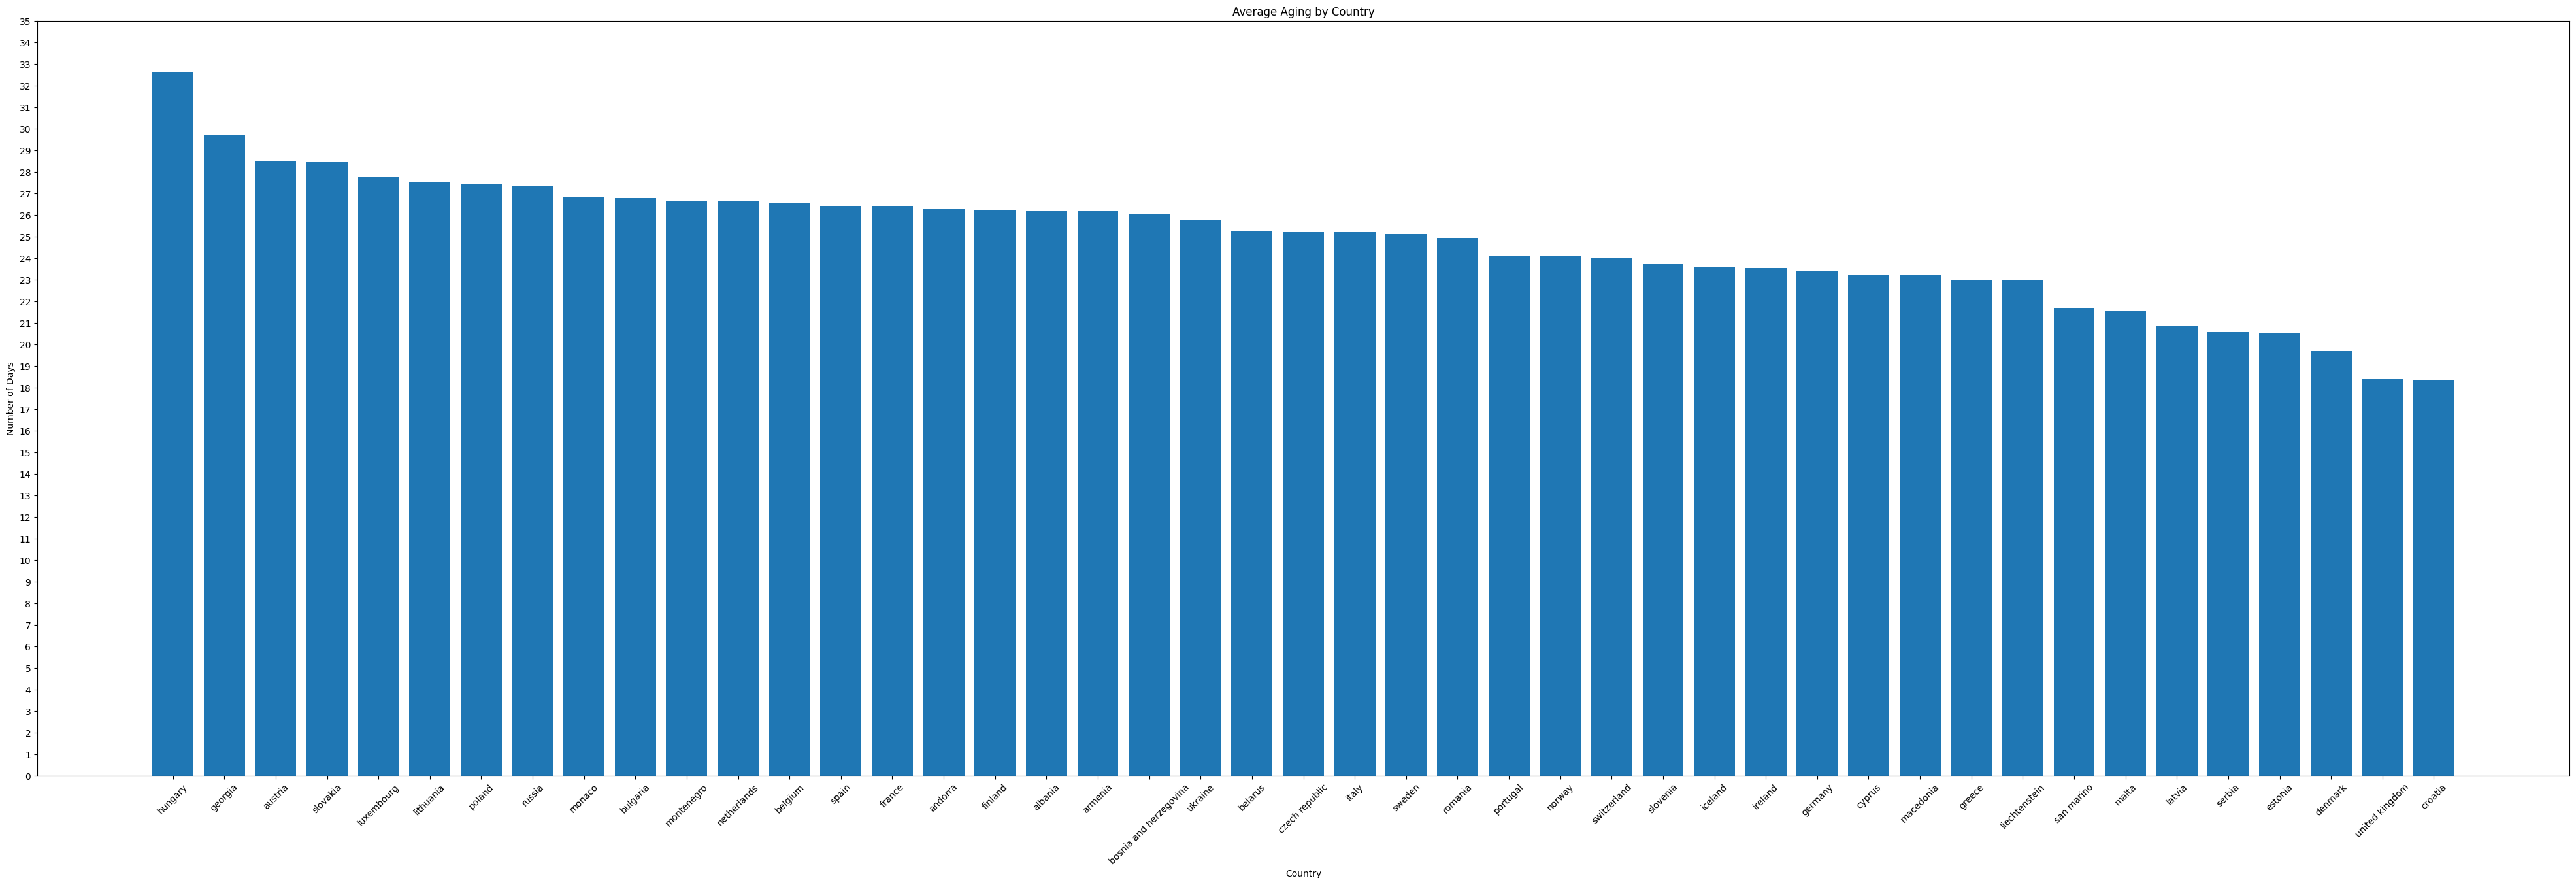

In [68]:
# інтервал часу між замовленням та його відвантаженням у розрізі країн
item_groupby = merged_df_for_countries.groupby("country")["aging"].mean().sort_values(ascending=False)
df = pd.DataFrame(item_groupby)

plt.figure(figsize=(50, 15))

# створюємо графік
plt.bar(x = df.index, height = df["aging"])

# додаємо заголовок та мітки
plt.title("Average Aging by Country")
plt.xlabel("Country")
plt.ylabel("Number of Days")

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 1, 1)
plt.yticks(y_ticks)

# відображаємо графік
plt.xticks(rotation=45)
plt.show()


Найдовше товари постачаються в Угорщину, Грузію та Австрію. Найшвидше в Хорватію та Британію.

**Візуалізація інтервалу часу між замовленням та його відвантаженням в розрізі регіонів**

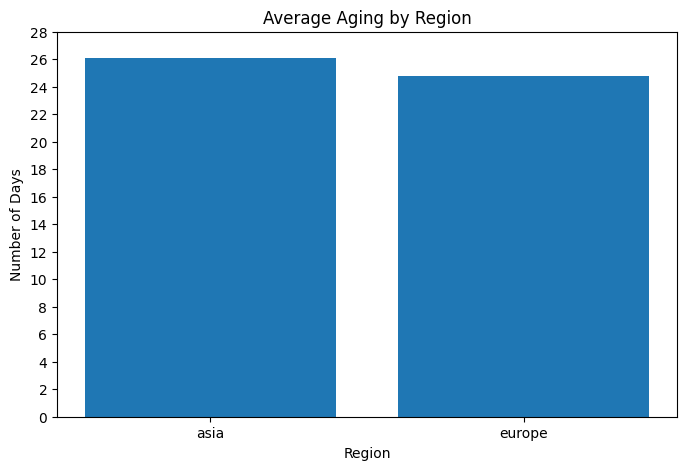

In [69]:
# інтервал часу між замовленням та його відвантаженням у розрізі регіонів
item_groupby = merged_df_for_countries.groupby("region")["aging"].mean().sort_values(ascending=False)
df = pd.DataFrame(item_groupby)

# створюємо графік
plt.figure(figsize=(8, 5))
plt.bar(x = df.index, height = df["aging"])

# додаємо заголовок та мітки
plt.title("Average Aging by Region")
plt.xlabel("Region")
plt.ylabel("Number of Days")

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 2, 2)
plt.yticks(y_ticks)

# відображаємо графік
plt.show()

Термін виконання замовлень не залежить від регіону доставки.

#####Analyze the average order aging period and its impact on sales

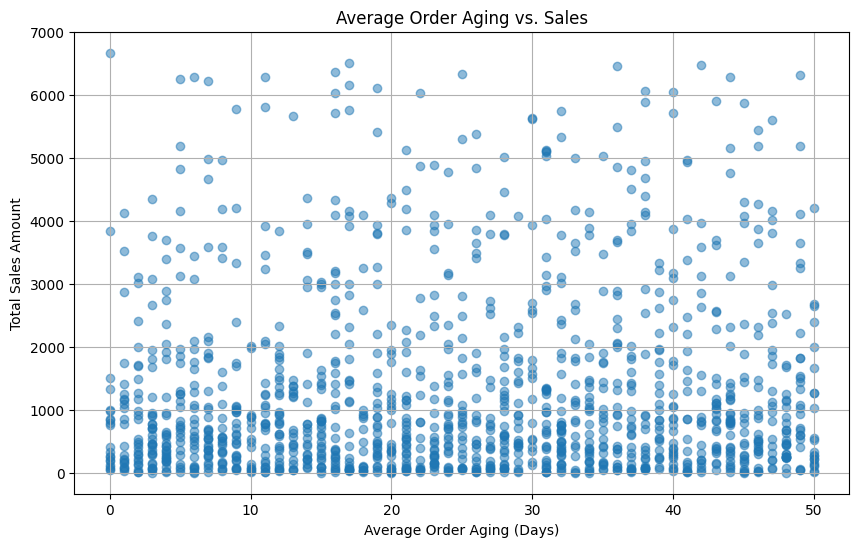

In [70]:
# робимо необхідні агрегування
avg_order_aging = merged_df.groupby("order_id")["aging"].mean()
avg_order_aging_sales = merged_df.groupby("order_id")["sales_amount"].sum()/1000

# створюємо графік
plt.figure(figsize=(10, 6))
plt.scatter(avg_order_aging, avg_order_aging_sales, alpha=0.5)

# додаємо заголовок та мітки
plt.xlabel("Average Order Aging (Days)")
plt.ylabel("Total Sales Amount")
plt.title("Average Order Aging vs. Sales")
plt.grid(True)

# відображаємо графік
plt.show()

In [75]:
import numpy as np

# обчислення коефіцієнта кореляції Пірсона
correlation = np.corrcoef(avg_order_aging, avg_order_aging_sales)[0, 1]

print(f'Коефіцієнт кореляції: {correlation:.2f}')


Коефіцієнт кореляції: 0.07


Коефіцієнт кореляції 0.07 означає дуже слабку або відсутню кореляцію, що підтверджує дані, отримані на графіку.
Отже, виручка не залежить від часу, необхідного на відвантаження товару.

#####Sales dynamics over time

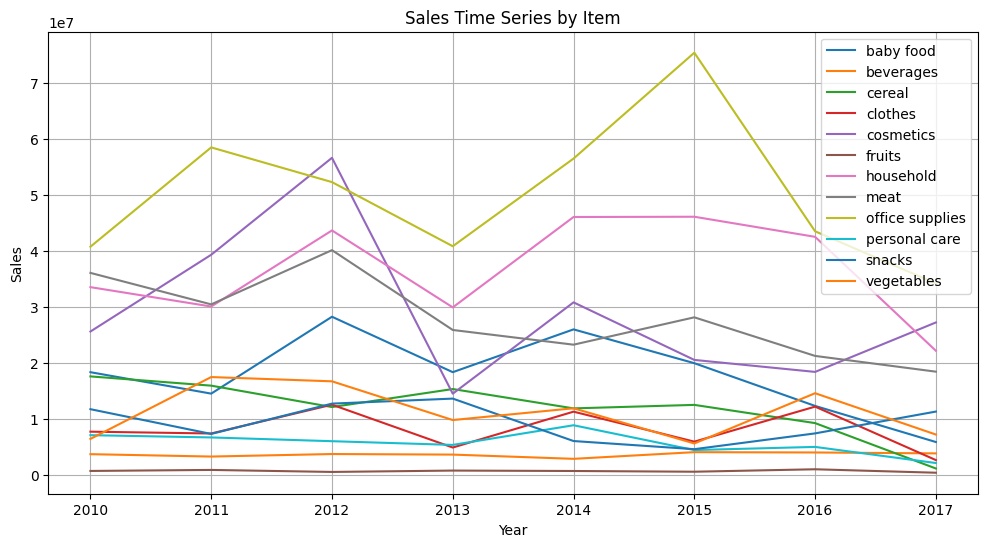

In [71]:
# залишаємо тільки рік
merged_df["order_year"] = merged_df["order_date"].dt.strftime('%Y')

# робимо необхідні агрегування
time_series_data = merged_df.groupby(["item_type", "order_year"])["sales_amount"].sum().reset_index()

# створюємо графік
items = time_series_data["item_type"].unique()
plt.figure(figsize=(12, 6))
for item in items:
    item_data = time_series_data[time_series_data["item_type"] == item]
    plt.plot(item_data["order_year"], item_data["sales_amount"], label=item)

# додаємо заголовок та мітки
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales Time Series by Item")

# відображаємо графік
plt.legend()
plt.grid(True)
plt.show()

Згідно з графіком спостерігається стрибкоподібна динаміка продажів за категоріями. Лінійна динаміка продажів спостерігається лише у категоріях овочі та фрукти. Майже у всіх категоріях спостерігається спад виручки в 2017 році, зворотня динаміка лише у ксометики та снеків.

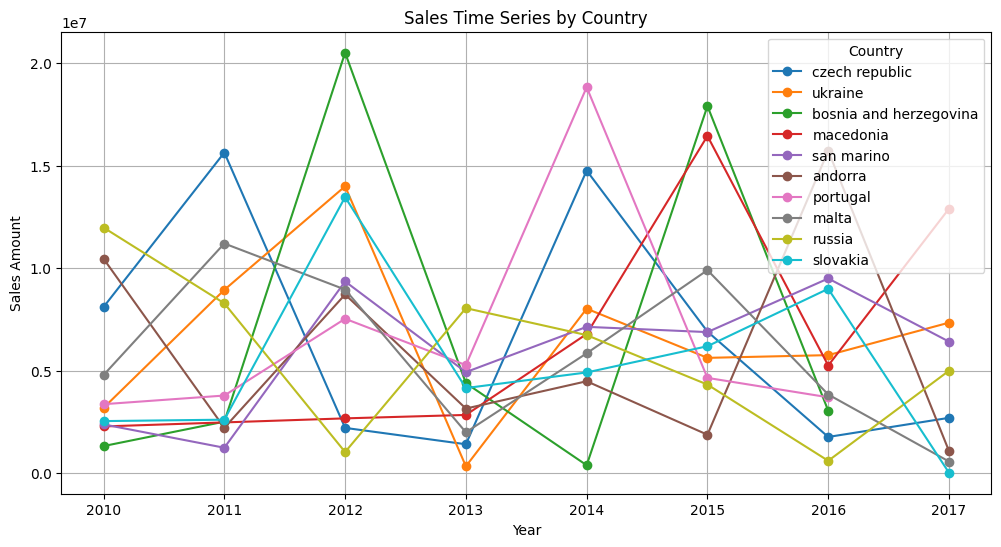

In [72]:
# Виділяємо тільки рік
merged_df_for_countries["order_year"] = merged_df_for_countries["order_date"].dt.year

# Групуємо дані за країною та роком
grouped_sales = merged_df_for_countries.groupby(["country", "order_year"])["sales_amount"].sum().reset_index()

# Вибираємо топ-10 країн за загальним обсягом продажів
top_countries = grouped_sales.groupby("country")["sales_amount"].sum().nlargest(10).index
filtered_sales = grouped_sales[grouped_sales["country"].isin(top_countries)]

# Створюємо графік
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = filtered_sales[filtered_sales["country"] == country]
    plt.plot(country_data["order_year"], country_data["sales_amount"], marker='o', label=country)

# Додаємо заголовок та підписи
plt.xlabel("Year")
plt.ylabel("Sales Amount")
plt.title("Sales Time Series by Country")
plt.legend(title="Country")
plt.grid(True)

# Відображаємо графік
plt.show()


Згідно з графіком спостерігається стрибкоподібна динаміка продажів у розрізі основних 10 країн.



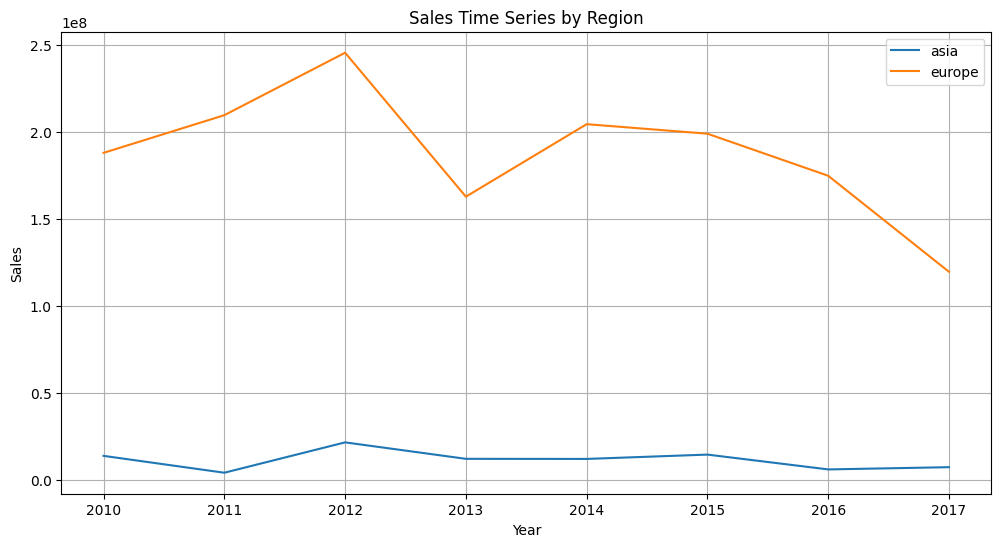

In [73]:
# залишаємо тільки рік
merged_df_for_countries["order_year"] = merged_df_for_countries["order_date"].dt.strftime('%Y')

# робимо необхідні агрегування
time_series_data = merged_df_for_countries.groupby(["region", "order_year"])["sales_amount"].sum().reset_index()
regions = time_series_data["region"].unique()

# створюємо графік
plt.figure(figsize=(12, 6))
for region in regions:
    region_data = time_series_data[time_series_data["region"] == region]
    plt.plot(region_data["order_year"], region_data["sales_amount"], label=region)

# додаємо заголовок та мітки
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales Time Series by Region")

# відображаємо графік
plt.legend()
plt.grid(True)
plt.show()

Спостерігається тенденція до зменшення обсягів продажів до Європи, починаючи з 2014 року. Обсяг продажів до Азії теж має тенденцію до зменшення, починаючи з 2016 року.

#####Analysis of product sales by day of the week

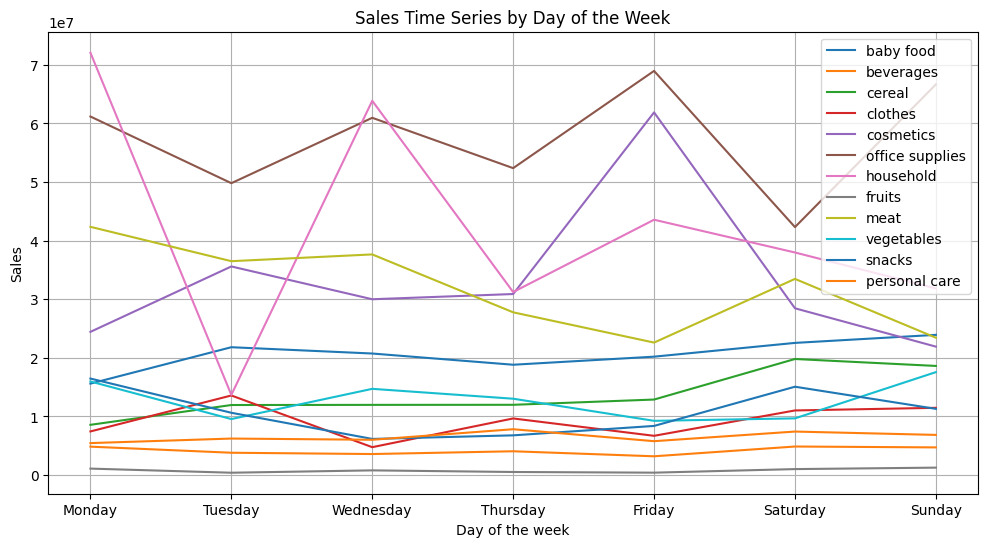

In [74]:
# залишаємо тільки день
merged_df["day_of_week"] = merged_df["order_date"].dt.day_name()

# задаємо правильну послідовність днів
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_order_dict = {day: i for i, day in enumerate(day_order)}
merged_df["day_of_week_num"] = merged_df["day_of_week"].map(day_order_dict)

# робимо необхідні агрегування
time_series_data = merged_df.groupby(["item_type", "day_of_week", "day_of_week_num"])["sales_amount"].sum().reset_index()

# сортуємо дні у необхідному порядку
time_series_data = time_series_data.sort_values("day_of_week_num")
items = time_series_data["item_type"].unique()


# створюємо графік
plt.figure(figsize=(12, 6))
for item in items:
    item_data = time_series_data[time_series_data["item_type"] == item]
    plt.plot(item_data["day_of_week"], item_data["sales_amount"], label=item)

# додаємо заголовок та мітки
plt.xlabel("Day of the week")
plt.ylabel("Sales")
plt.title("Sales Time Series by Day of the Week")

# відображаємо графік
plt.legend()
plt.grid(True)
plt.show()

У таких категорій як офісне приладдя, косметика, мясо та побутові товари спостерігається сезонність продажів за днями тижня. У інших категорій сезонність майже не виражена.

#**Загальний висновок**

Компанія демонструє різну ефективність продажів в залежності від категорій товарів, країн та каналів реалізації. Найпопулярніші категорії товарів не завжди є найбільш прибутковими, що свідчить про значні відмінності у рівні націнки. Наприклад, косметика, хоча й займає лише 8 місце за популярністю, є найбільш прибутковою категорією, що вказує на високу маржинальність.

Основним ринком збуту є Європа, на яку припадає 94% виручки та прибутку. Однак, з 2014 року спостерігається спад обсягів продажів у цьому регіоні. Виручка компанії найбільша у таких країнах, як Чехія та Україна, тоді як найбільший прибуток надходить з Андори та Мальти.

Продажі рівномірно розподілені між онлайн- та офлайн-каналами, проте переваги споживачів відрізняються залежно від категорії товарів.

Доставка товарів займає від 22 до 27 днів, причому найдовше товари постачаються в Угорщину, Грузію та Австрію. Однак термін виконання замовлень не впливає на рівень виручки.

Динаміка продажів є нестабільною: у більшості категорій вона стрибкоподібна, лінійне зростання спостерігається лише у категоріях овочів і фруктів. У 2017 році в багатьох категоріях зафіксовано спад виручки, проте косметика та снеки показали зворотну тенденцію.

Також у деяких категоріях (офісне приладдя, косметика, м’ясо, побутові товари) простежується сезонність за днями тижня, тоді як інші категорії мають менш виражену сезонність.

Загалом компанії варто звернути увагу на зниження продажів у ключових регіонах, оптимізувати логістику та враховувати особливості попиту для підвищення ефективності продажів.